In [1]:
import pandas as pd
import numpy as np
import os
import gzip
import shutil

from pathlib import Path

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
hospital_data_path = Path("/Users/jnk789/Desktop/NW/MSAI 349 - Machine Learning/Projects/Dataaa/mimic-iv-3.1/hosp")
icu_data_path = Path("/Users/jnk789/Desktop/NW/MSAI 349 - Machine Learning/Projects/Dataaa/mimic-iv-3.1/icu")
hospital_data_path, icu_data_path

(PosixPath('/Users/jnk789/Desktop/NW/MSAI 349 - Machine Learning/Projects/Dataaa/mimic-iv-3.1/hosp'),
 PosixPath('/Users/jnk789/Desktop/NW/MSAI 349 - Machine Learning/Projects/Dataaa/mimic-iv-3.1/icu'))

In [3]:
def extract_gz_files_in_directory(directory_path):
    """
    Extracts all .gz files in the given directory and saves the decompressed files in the same directory.
    :param directory_path: The path of the directory containing the .gz files.
    """
    try:
        # List all files in the directory
        files = os.listdir(directory_path)

        # Process each file
        for file_name in files:
            # Check if the file is a .gz file
            if file_name.endswith('.gz'):
                file_path = os.path.join(directory_path, file_name)
                extracted_file_path = os.path.splitext(file_path)[0]  # Remove .gz extension
                
                # Decompress the .gz file
                with gzip.open(file_path, 'rb') as gz_file:
                    with open(extracted_file_path, 'wb') as extracted_file:
                        shutil.copyfileobj(gz_file, extracted_file)
                
                print(f"Extracted: {file_name} to {extracted_file_path}")
        
        print("All .gz files have been processed.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [4]:
# extract_gz_files_in_directory(hospital_data_path)

In [ ]:
# extract_gz_files_in_directory(icu_data_path)

: 

## Data Exploration

### Admissions Data


Admissions: Every single patient in hosp

In [5]:
admissions_df = pd.read_csv(f"{hospital_data_path}/admissions.csv", low_memory=True)
admissions_df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546023,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P13JMH,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
546024,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P38XL8,PHYSICIAN REFERRAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
546025,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P33612,EMERGENCY ROOM,DIED,Private,English,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
546026,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P036NA,EMERGENCY ROOM,HOME,Private,English,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [6]:
print(f"Unique Patients: {len(admissions_df['subject_id'].unique())}")

Unique Patients: 223452


### Diagnosis data

In [7]:
diag_df = pd.read_csv(f"{hospital_data_path}/diagnoses_icd.csv", low_memory=True)
diag_df

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9
...,...,...,...,...,...
6364483,19999987,23865745,7,41401,9
6364484,19999987,23865745,8,78039,9
6364485,19999987,23865745,9,0413,9
6364486,19999987,23865745,10,36846,9


In [8]:
# Extract all the diagnosis received by patient for particular visit
print(f"Unique Subject IDs: {len(diag_df['subject_id'].unique())}")
print(f"Unique HADM IDs: {len(diag_df['hadm_id'].unique())}")

Unique Subject IDs: 223291
Unique HADM IDs: 545497


In [67]:
# diag_df[diag_df['subject_id'] == 10000032]

### Diagnoses ICD 

In [9]:
d_icd_diagnoses = pd.read_csv(f"{hospital_data_path}/d_icd_diagnoses.csv", low_memory=True)
d_icd_diagnoses

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A
...,...,...,...
112102,Z992,10,Dependence on renal dialysis
112103,Z993,10,Dependence on wheelchair
112104,Z998,10,Dependence on other enabling machines and devices
112105,Z9981,10,Dependence on supplemental oxygen


### Labevents Data - All the lab events 

In [10]:
labevents_df = pd.read_csv(f"{hospital_data_path}/labevents.csv", low_memory=True)
labevents_df

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,1,10000032,NaN,2704548,50931,P69FQC,2180-03-23 11:51:00,2180-03-23 15:56:00,___,95.00,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
1,2,10000032,NaN,36092842,51071,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
2,3,10000032,NaN,36092842,51074,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
3,4,10000032,NaN,36092842,51075,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,BENZODIAZEPINE IMMUNOASSAY SCREEN DOES NOT DET...
4,5,10000032,NaN,36092842,51079,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158374759,159057534,19999987,23865745.0,59879875,51279,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,3.52,3.52,m/uL,4.2,5.4,abnormal,ROUTINE,NaN
158374760,159057535,19999987,23865745.0,59879875,51301,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,5.7,5.70,K/uL,4.0,11.0,NaN,ROUTINE,NaN
158374761,159057536,19999987,NaN,74914384,50912,P95A45,2146-02-07 11:13:00,2146-02-07 16:26:00,1.1,1.10,mg/dL,0.4,1.1,NaN,ROUTINE,NaN
158374762,159057537,19999987,NaN,74914384,50920,P95A45,2146-02-07 11:13:00,2146-02-07 16:26:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,"Using this patient's age, gender, and serum cr..."


In [11]:
labevents_df.columns

Index(['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid',
       'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments'],
      dtype='object')

In [12]:
print(f"Unique Subject IDs: {len(labevents_df['subject_id'].unique())}")
print(f"Total number of rows: {len(labevents_df)}")
print(f"Null values in hadm ID: {sum(labevents_df['hadm_id'].isna())}")

Unique Subject IDs: 313442
Total number of rows: 158374764
Null values in hadm ID: 73768897


In [13]:
# Cleaning 1 - Remove NULL values from hadm_id and  
labevents_df = labevents_df[labevents_df['hadm_id'].notna()]
print(len(labevents_df))

84605867


In [14]:
labevents_df['hadm_id'].isnull().sum()

0

### Micro Biology Events

In [15]:
microbio_df = pd.read_csv(f"{hospital_data_path}/microbiologyevents.csv", low_memory=True)
microbio_df

/var/folders/zc/vmpmq9_d5yl4rdgmklr_48m00000gn/T/ipykernel_21258/3640648652.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  microbio_df = pd.read_csv(f"{hospital_data_path}/microbiologyevents.csv", low_memory=True)


,microevent_id,subject_id,hadm_id,micro_specimen_id,order_provider_id,chartdate,charttime,spec_itemid,spec_type_desc,test_seq,...,org_name,isolate_num,quantity,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,comments
0,1,10000032,NaN,1304715,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70046,IMMUNOLOGY,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,___
1,2,10000032,NaN,3342526,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70093,Blood (Toxo),1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE FOR TOXOPLASMA IgG ANTIBODY BY EIA. ...
2,3,10000032,NaN,3910370,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70017,SEROLOGY/BLOOD,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONREACTIVE. Reference Range: Non-Reactive.
3,4,10000032,NaN,5401234,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70017,SEROLOGY/BLOOD,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE BY EIA. A positive IgG result genera...
4,5,10000032,NaN,6287540,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70046,IMMUNOLOGY,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIV-1 RNA is not detected. Performed using th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988219,3988220,19999987,23865745.0,4998105,NaN,2145-11-05 00:00:00,2145-11-05 10:35:00,70012,BLOOD CULTURE,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GROWTH.
3988220,3988221,19999987,23865745.0,945091,NaN,2145-11-05 00:00:00,2145-11-05 12:15:00,70012,BLOOD CULTURE,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GROWTH.
3988221,3988222,19999987,23865745.0,1483778,NaN,2145-11-06 00:00:00,2145-11-06 13:15:00,70012,BLOOD CULTURE,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GROWTH.
3988222,3988223,19999987,23865745.0,9584280,NaN,2145-11-06 00:00:00,2145-11-06 17:05:00,70012,BLOOD CULTURE,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GROWTH.


### OMR Data

In [16]:
omr_df = pd.read_csv(f"{hospital_data_path}/omr.csv", low_memory=True)
omr_df

,subject_id,chartdate,seq_num,result_name,result_value
0,10000032,2180-04-27,1,Blood Pressure,110/65
1,10000032,2180-04-27,1,Weight (Lbs),94
2,10000032,2180-05-07,1,BMI (kg/m2),18.0
3,10000032,2180-05-07,1,Height (Inches),60
4,10000032,2180-05-07,1,Weight (Lbs),92.15
...,...,...,...,...,...
7753022,19999828,2148-02-26,1,Blood Pressure,115/79
7753023,19999828,2148-04-29,1,Blood Pressure,105/67
7753024,19999828,2148-07-22,1,Blood Pressure,104/76
7753025,19999828,2148-10-19,1,Blood Pressure,112/73


In [107]:
omr_df.head()

,subject_id,chartdate,seq_num,result_name,result_value
0,10000032,2180-04-27,1,Blood Pressure,110/65
1,10000032,2180-04-27,1,Weight (Lbs),94
2,10000032,2180-05-07,1,BMI (kg/m2),18.0
3,10000032,2180-05-07,1,Height (Inches),60
4,10000032,2180-05-07,1,Weight (Lbs),92.15


### Patients Data

In [17]:
# patients
patients_df = pd.read_csv(f"{hospital_data_path}/patients.csv", low_memory=True)
patients_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17
364625,19999914,F,49,2158,2017 - 2019,NaN


### Transfers Data

In [18]:
transfers_df = pd.read_csv(f"{hospital_data_path}/transfers.csv", low_memory=True)
transfers_df

,subject_id,hadm_id,transfer_id,eventtype,careunit,intime,outtime
0,10000032,22595853.0,33258284,ED,Emergency Department,2180-05-06 19:17:00,2180-05-06 23:30:00
1,10000032,22595853.0,35223874,admit,Transplant,2180-05-06 23:30:00,2180-05-07 17:21:27
2,10000032,22595853.0,36904543,discharge,UNKNOWN,2180-05-07 17:21:27,NaN
3,10000032,22841357.0,34100253,discharge,UNKNOWN,2180-06-27 18:49:12,NaN
4,10000032,22841357.0,34703856,admit,Transplant,2180-06-26 21:31:00,2180-06-27 18:49:12
...,...,...,...,...,...,...,...
2413576,19999914,NaN,32002659,ED,Emergency Department,2158-12-24 11:41:00,2158-12-24 11:56:00
2413577,19999987,23865745.0,30249304,transfer,Neurology,2145-11-04 21:29:30,2145-11-11 13:00:47
2413578,19999987,23865745.0,34731548,ED,Emergency Department,2145-11-02 19:28:00,2145-11-02 22:59:00
2413579,19999987,23865745.0,36195440,admit,Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30


In [19]:
transfers_df['eventtype'].unique()

array(['ED', 'admit', 'discharge', 'transfer'], dtype=object)

In [20]:
transfers_df['careunit'].unique()

array(['Emergency Department', 'Transplant', 'UNKNOWN',
       'Medical Intensive Care Unit (MICU)',
       'Emergency Department Observation', 'Medicine', 'Med/Surg',
       'Surgery/Trauma', 'Discharge Lounge',
       'Medical/Surgical (Gynecology)', 'Medicine/Cardiology',
       'Thoracic Surgery', 'Vascular', 'Labor & Delivery',
       'Obstetrics (Postpartum & Antepartum)', 'Neurology',
       'Surgery/Pancreatic/Biliary/Bariatric', 'Psychiatry',
       'Hematology/Oncology', 'Surgery/Vascular/Intermediate',
       'Surgical Intensive Care Unit (SICU)', 'Surgery', 'Med/Surg/GYN',
       'PACU', 'Cardiology Surgery Intermediate',
       'Medical/Surgical Intensive Care Unit (MICU/SICU)',
       'Hematology/Oncology Intermediate', 'Med/Surg/Trauma',
       'Medicine/Cardiology Intermediate', 'Cardiac Surgery',
       'Cardiac Vascular Intensive Care Unit (CVICU)',
       'Coronary Care Unit (CCU)', 'Observation', 'Obstetrics Postpartum',
       'Neuro Surgical Intensive Care Unit (N

In [ ]:
icu_types = ["Medical Intensive Care Unit (MICU)", 
             "Surgical Intensive Care Unit (SICU)", 
             "Medical/Surgical Intensive Care Unit (MICU/SICU)", 
             "Cardiac Vascular Intensive Care Unit (CVICU)", 
             "Neuro Surgical Intensive Care Unit (Neuro SICU)", 
             "Trauma SICU (TSICU)", 
             "Intensive Care Unit (ICU)"]

In [22]:
# Just get the ICU 
transfers_df[transfers_df['careunit'] == 'UNKNOWN']['eventtype'].value_counts()

eventtype
discharge    546024
admit            98
transfer         74
Name: count, dtype: int64

In [23]:
icu_transfers_df = transfers_df[transfers_df['careunit'].isin(icu_types) & transfers_df['eventtype'].isin(['transfer'])]
icu_transfers_df

,subject_id,hadm_id,transfer_id,eventtype,careunit,intime,outtime
221,10001217,24597018.0,37067082,transfer,Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00
224,10001217,27703517.0,34592300,transfer,Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41
316,10001725,25563031.0,31205490,transfer,Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56
331,10001843,26133978.0,39698942,transfer,Medical/Surgical Intensive Care Unit (MICU/SICU),2134-12-05 18:50:03,2134-12-06 14:38:26
378,10001884,26184834.0,37510196,transfer,Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30
...,...,...,...,...,...,...,...
2413409,19999287,22997012.0,38527782,transfer,Medical Intensive Care Unit (MICU),2197-07-26 03:52:29,2197-07-27 16:07:29
2413417,19999297,21439025.0,37364566,transfer,Medical Intensive Care Unit (MICU),2162-08-16 05:48:32,2162-08-23 06:22:41
2413442,19999442,26785317.0,32336619,transfer,Surgical Intensive Care Unit (SICU),2148-11-19 14:23:43,2148-11-26 13:12:15
2413571,19999840,21033226.0,34767778,transfer,Surgical Intensive Care Unit (SICU),2164-09-13 09:37:48,2164-09-17 16:35:15


In [227]:
icu_transfers_df.eventtype.value_counts()

eventtype
transfer    61508
Name: count, dtype: int64

### Merge Datasets

In [24]:
# Identify ICU upgrades
icu_transfers = transfers_df[transfers_df['careunit'].isin(icu_types)].copy()
icu_transfers['is_upgrade'] = 1

# Get first ICU admission time for each hadm_id
first_icu = icu_transfers.groupby(['subject_id', 'hadm_id'])['intime'].min().reset_index()

In [25]:
first_icu

,subject_id,hadm_id,intime
0,10000032,29079034.0,2180-07-23 14:00:00
1,10000690,25860671.0,2150-11-02 19:37:00
2,10000980,26913865.0,2189-06-27 08:42:00
3,10001217,24597018.0,2157-11-20 19:18:02
4,10001217,27703517.0,2157-12-19 15:42:24
...,...,...,...
76500,19999442,26785317.0,2148-11-19 14:23:43
76501,19999625,25304202.0,2139-10-10 19:18:00
76502,19999828,25744818.0,2149-01-08 18:12:00
76503,19999840,21033226.0,2164-09-12 09:26:28


In [26]:
# patients_df.head()
admissions_df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546023,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P13JMH,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
546024,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P38XL8,PHYSICIAN REFERRAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
546025,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P33612,EMERGENCY ROOM,DIED,Private,English,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
546026,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P036NA,EMERGENCY ROOM,HOME,Private,English,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [27]:
# Demographics (static per subject)
demographics = patients_df[['subject_id', 'gender', 'anchor_age']].merge(
    admissions_df[['subject_id', 'hadm_id', 'race', 'insurance', 'marital_status']], 
    on='subject_id'
)

demographics

,subject_id,gender,anchor_age,hadm_id,race,insurance,marital_status
0,10000032,F,52,22595853,WHITE,Medicaid,WIDOWED
1,10000032,F,52,22841357,WHITE,Medicaid,WIDOWED
2,10000032,F,52,25742920,WHITE,Medicaid,WIDOWED
3,10000032,F,52,29079034,WHITE,Medicaid,WIDOWED
4,10000068,F,19,25022803,WHITE,NaN,SINGLE
...,...,...,...,...,...,...,...
546023,19999828,F,46,25744818,WHITE,Medicaid,SINGLE
546024,19999828,F,46,29734428,WHITE,Medicaid,SINGLE
546025,19999840,M,58,21033226,WHITE,Private,WIDOWED
546026,19999840,M,58,26071774,WHITE,Private,WIDOWED


In [28]:
# Diagnoses (count and primary diagnosis)
diagnoses_features = diag_df.merge(
    d_icd_diagnoses, on='icd_code'
).groupby(['subject_id', 'hadm_id']).agg({
    'seq_num': 'min',  # Get primary diagnosis
    'icd_code': 'count'  # Count total diagnoses
}).reset_index()

In [29]:
diagnoses_features

,subject_id,hadm_id,seq_num,icd_code
0,10000032,22595853,1,8
1,10000032,22841357,1,8
2,10000032,25742920,1,11
3,10000032,29079034,1,14
4,10000068,25022803,1,1
...,...,...,...,...
545492,19999828,25744818,1,19
545493,19999828,29734428,1,22
545494,19999840,21033226,1,12
545495,19999840,26071774,1,7


In [30]:
features_df = demographics.merge(
    diagnoses_features, 
    on=['subject_id', 'hadm_id'],
    how='left'
).merge(
    first_icu[['subject_id', 'hadm_id', 'intime']],
    on=['subject_id', 'hadm_id'],
    how='left'
)

In [31]:
features_df

,subject_id,gender,anchor_age,hadm_id,race,insurance,marital_status,seq_num,icd_code,intime
0,10000032,F,52,22595853,WHITE,Medicaid,WIDOWED,1.0,8.0,NaN
1,10000032,F,52,22841357,WHITE,Medicaid,WIDOWED,1.0,8.0,NaN
2,10000032,F,52,25742920,WHITE,Medicaid,WIDOWED,1.0,11.0,NaN
3,10000032,F,52,29079034,WHITE,Medicaid,WIDOWED,1.0,14.0,2180-07-23 14:00:00
4,10000068,F,19,25022803,WHITE,NaN,SINGLE,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
546023,19999828,F,46,25744818,WHITE,Medicaid,SINGLE,1.0,19.0,2149-01-08 18:12:00
546024,19999828,F,46,29734428,WHITE,Medicaid,SINGLE,1.0,22.0,NaN
546025,19999840,M,58,21033226,WHITE,Private,WIDOWED,1.0,12.0,2164-09-12 09:26:28
546026,19999840,M,58,26071774,WHITE,Private,WIDOWED,1.0,7.0,NaN


In [72]:
labevents_df

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
110,111,10000032,22595853.0,31810588,51464,NaN,2180-05-07 00:10:00,2180-05-07 00:40:00,NaN,NaN,mg/dL,NaN,NaN,NaN,ROUTINE,NEG.
111,112,10000032,22595853.0,31810588,51466,NaN,2180-05-07 00:10:00,2180-05-07 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.
112,113,10000032,22595853.0,31810588,51478,NaN,2180-05-07 00:10:00,2180-05-07 00:40:00,NaN,NaN,mg/dL,NaN,NaN,NaN,ROUTINE,NEG.
113,114,10000032,22595853.0,31810588,51484,NaN,2180-05-07 00:10:00,2180-05-07 00:40:00,NaN,NaN,mg/dL,NaN,NaN,NaN,ROUTINE,NEG.
114,115,10000032,22595853.0,31810588,51486,NaN,2180-05-07 00:10:00,2180-05-07 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158374756,159057531,19999987,23865745.0,59879875,51250,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,104,104.00,fL,82.0,98.0,abnormal,ROUTINE,NaN
158374757,159057532,19999987,23865745.0,59879875,51265,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,129,129.00,K/uL,150.0,440.0,abnormal,ROUTINE,NaN
158374758,159057533,19999987,23865745.0,59879875,51277,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,15.4,15.40,%,10.5,15.5,NaN,ROUTINE,NaN
158374759,159057534,19999987,23865745.0,59879875,51279,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,3.52,3.52,m/uL,4.2,5.4,abnormal,ROUTINE,NaN


In [87]:
def get_lab_features(row, lab_events_df, window_hours=48):
    admission_labs = lab_events_df[
        (lab_events_df['subject_id'] == row['subject_id']) & 
        (lab_events_df['hadm_id'] == row['hadm_id']) &
        (lab_events_df['charttime'] <= row['intime'])
    ]
    # recent_labs = admission_labs[
    #     admission_labs['charttime'] >= (row['first_icu_time'] - pd.Timedelta(hours=window_hours))
    # ]
    return pd.Series({
        'lab_count': len(admission_labs),
        'unique_labs': admission_labs['itemid'].nunique(),
        'abnormal_ratio': (admission_labs['flag'] != 'normal').mean()
    })

In [32]:
# def get_lab_fe 

def get_lab_features(row, lab_events_df):
   # Pre-filter labs for this admission
   mask = (lab_events_df['subject_id'] == row['subject_id']) & \
          (lab_events_df['hadm_id'] == row['hadm_id']) & \
          (lab_events_df['charttime'] <= row['intime'])
   admission_labs = lab_events_df.loc[mask]
   
   # Vectorized operations
   lab_groups = admission_labs.groupby('itemid')['valuenum']
   time_diffs = admission_labs.sort_values('charttime').groupby('itemid')['charttime'].diff()
   
   stats = {
       'total_labs': len(admission_labs),
       'unique_labs': admission_labs['itemid'].nunique(),
       'abnormal_ratio': (admission_labs['flag'] != 'normal').mean(),
       'value_ranges': (lab_groups.max() - lab_groups.min()).mean(),
       'test_frequency': time_diffs.mean()/3600
   }
   
   # Efficient trend calculation using numpy
   if len(admission_labs) > 1:
       times = (admission_labs['charttime'] - admission_labs['charttime'].min()).dt.total_seconds()
       trends = np.polyfit(times, admission_labs['valuenum'], 1)[0]
       stats['trend'] = trends
   
   return pd.Series(stats)

In [33]:
features_df.head()

,subject_id,gender,anchor_age,hadm_id,race,insurance,marital_status,seq_num,icd_code,intime
0,10000032,F,52,22595853,WHITE,Medicaid,WIDOWED,1.0,8.0,NaN
1,10000032,F,52,22841357,WHITE,Medicaid,WIDOWED,1.0,8.0,NaN
2,10000032,F,52,25742920,WHITE,Medicaid,WIDOWED,1.0,11.0,NaN
3,10000032,F,52,29079034,WHITE,Medicaid,WIDOWED,1.0,14.0,2180-07-23 14:00:00
4,10000068,F,19,25022803,WHITE,NaN,SINGLE,1.0,1.0,NaN


In [34]:
# # Add lab features
# features_df = features_df.apply(
#     lambda row: get_lab_features(row, labevents_df), 
#     axis=1
# )

features_df.loc[3, :]['intime']

'2180-07-23 14:00:00'

In [35]:
mask = (labevents_df['subject_id'] == 10000032) & \
          (labevents_df['hadm_id'] == 22595853.0) & \
          (pd.Timestamp(labevents_df['charttime']) <= pd.Timestamp('2180-07-23 14:00:00'))
admission_labs = labevents_df.loc[mask]

TypeError: Cannot convert input [110          2180-05-07 00:10:00
111          2180-05-07 00:10:00
112          2180-05-07 00:10:00
113          2180-05-07 00:10:00
114          2180-05-07 00:10:00
                    ...         
158374756    2145-11-09 05:30:00
158374757    2145-11-09 05:30:00
158374758    2145-11-09 05:30:00
158374759    2145-11-09 05:30:00
158374760    2145-11-09 05:30:00
Name: charttime, Length: 84605867, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [121]:
labevents_df.loc[0, :] 

KeyboardInterrupt: 

In [ ]:
features_df['admission_seq'] = features_df.groupby('subject_id')['hadm_id'].rank()

# Add features from previous admissions
def add_history_features(group):
    group['prev_icu_visits'] = group['is_icu'].shift(1).fillna(0).cumsum()
    group['days_since_last_admission'] = group['admittime'].diff().dt.days
    return group

features_df = features_df.groupby('subject_id').apply(add_history_features)

## NEW



In [36]:
def create_icu_labels(transfers_df):
    """
    Create binary labels for ICU admissions
    """
    # Define ICU units
    icu_units = [
        "Medical Intensive Care Unit (MICU)",
        "Surgical Intensive Care Unit (SICU)", 
        "Medical/Surgical Intensive Care Unit (MICU/SICU)",
        "Cardiac Vascular Intensive Care Unit (CVICU)",
        "Neuro Surgical Intensive Care Unit (Neuro SICU)",
        "Trauma SICU (TSICU)",
        "Intensive Care Unit (ICU)"
    ]
    
    # Get first ICU admission for each hospital stay
    icu_transfers = transfers_df[transfers_df['careunit'].isin(icu_units)]
    first_icu = icu_transfers.groupby(['subject_id', 'hadm_id'])['intime'].min().reset_index()
    
    # Create binary label
    first_icu['is_icu_patient'] = 1
    
    return first_icu[['subject_id', 'hadm_id', 'is_icu_patient', 'intime']]

In [37]:
def process_diagnoses(diagnoses_df):
    """
    Create diagnosis features
    """
    # Count diagnoses per admission
    diagnosis_counts = diagnoses_df.groupby(['subject_id', 'hadm_id']).size().reset_index()
    diagnosis_counts.columns = ['subject_id', 'hadm_id', 'diagnosis_count']
    
    # Get primary diagnosis
    primary_dx = diagnoses_df[diagnoses_df['seq_num'] == 1][['subject_id', 'hadm_id', 'icd_code']]
    primary_dx = primary_dx.rename(columns={'icd_code': 'primary_diagnosis'})
    
    return diagnosis_counts.merge(primary_dx, on=['subject_id', 'hadm_id'])

In [38]:
def process_lab_events(labevents_df, cutoff_time=None):
    """
    Create features from lab events
    """
    # Filter events before ICU admission if cutoff time provided
    if cutoff_time is not None:
        labevents_df = labevents_df[pd.to_datetime(labevents_df['charttime']) <= cutoff_time]
    
    # Calculate lab features per admission
    lab_features = labevents_df.groupby(['subject_id', 'hadm_id']).agg({
        'itemid': ['count', 'nunique'],  # Total labs and unique lab types
        'flag': lambda x: (x == 'abnormal').mean()  # Proportion of abnormal results
    }).reset_index()
    
    lab_features.columns = ['subject_id', 'hadm_id', 'total_labs', 'unique_labs', 'abnormal_ratio']
    return lab_features

In [39]:
def add_demographics(base_df, patients_df, admissions_df):
    """
    Add demographic features
    """
    # Get relevant columns from patients
    demographics = patients_df[['subject_id', 'gender', 'anchor_age']]
    
    # Add admission features
    demographics = demographics.merge(
        admissions_df[['subject_id', 'hadm_id', 'insurance', 'language', 'marital_status', 'race']],
        on='subject_id'
    )
    
    return base_df.merge(demographics, on=['subject_id', 'hadm_id'])

In [40]:
def create_admission_history(admissions_df):
    """
    Create features about patient's admission history
    """
    # Sort admissions by patient and time
    admissions_df = admissions_df.sort_values(['subject_id', 'admittime'])
    
    # Calculate admission sequence and time since last admission
    history = admissions_df.groupby('subject_id').agg({
        'hadm_id': 'count',
        'admittime': lambda x: x.diff().dt.days.mean()
    }).reset_index()
    
    history.columns = ['subject_id', 'previous_admissions', 'avg_days_between_admissions']
    return history

In [44]:
base_df = create_final_dataset(admissions_df, patients_df, transfers_df, diag_df, labevents_df)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

def process_detailed_labs(labevents_df, admissions_df, d_labitems_df=None):
    """
    Process lab events with detailed temporal information before hospital admission
    
    Parameters:
    -----------
    labevents_df : DataFrame
        The lab events data
    admissions_df : DataFrame
        The admissions data with admission times
    d_labitems_df : DataFrame, optional
        Dictionary of lab items for mapping lab names
        
    Returns:
    --------
    DataFrame
        Processed lab events with temporal features
    """
    # Convert times to datetime
    labevents_df['charttime'] = pd.to_datetime(labevents_df['charttime'])
    admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
    
    # Get first admission time for each patient
    first_admissions = admissions_df.groupby('subject_id')['admittime'].min().reset_index()
    
    def process_patient_labs(patient_labs, admission_time):
        """Process labs for a single patient"""
        # Filter labs before admission
        pre_admission_labs = patient_labs[patient_labs['charttime'] <= admission_time]
        
        if len(pre_admission_labs) == 0:
            return pd.Series({
                'lab_count': 0,
                'unique_labs': 0,
                'abnormal_count': 0,
                'last_lab_hours': np.nan,
                'lab_values': None
            })
        
        # Calculate time differences
        time_diffs = (admission_time - pre_admission_labs['charttime']).dt.total_seconds() / 3600
        
        # Process each lab item separately
        lab_stats = {}
        for item_id in pre_admission_labs['itemid'].unique():
            item_labs = pre_admission_labs[pre_admission_labs['itemid'] == item_id]
            
            # Get the last few measurements
            last_measurements = item_labs.nlargest(3, 'charttime')
            
            lab_stats[f'lab_{item_id}_last'] = last_measurements['valuenum'].iloc[0] if len(last_measurements) > 0 else np.nan
            lab_stats[f'lab_{item_id}_mean'] = item_labs['valuenum'].mean()
            lab_stats[f'lab_{item_id}_std'] = item_labs['valuenum'].std()
            lab_stats[f'lab_{item_id}_trend'] = (
                last_measurements['valuenum'].diff().mean() 
                if len(last_measurements) > 1 else np.nan
            )
            
        return pd.Series({
            'lab_count': len(pre_admission_labs),
            'unique_labs': pre_admission_labs['itemid'].nunique(),
            'abnormal_count': (pre_admission_labs['flag'] == 'abnormal').sum(),
            'last_lab_hours': time_diffs.min(),
            **lab_stats
        })

    # Process labs for each patient
    results = []
    for _, row in first_admissions.iterrows():
        patient_labs = labevents_df[labevents_df['subject_id'] == row['subject_id']]
        
        if len(patient_labs) > 0:
            stats = process_patient_labs(patient_labs, row['admittime'])
            stats['subject_id'] = row['subject_id']
            results.append(stats)
    
    return pd.DataFrame(results)

def get_common_labs(labevents_df, min_frequency=0.01):
    """
    Identify commonly performed lab tests
    """
    total_patients = labevents_df['subject_id'].nunique()
    lab_counts = labevents_df.groupby('itemid')['subject_id'].nunique()
    common_labs = lab_counts[lab_counts > total_patients * min_frequency].index
    return list(common_labs)

def create_temporal_lab_features(labevents_df, admissions_df, time_windows=[24, 48, 72]):
    """
    Create temporal features for lab events in different time windows before admission
    """
    lab_features = {}
    
    for window in time_windows:
        # Filter labs within time window
        mask = (
            pd.to_datetime(admissions_df['admittime']) - 
            pd.to_datetime(labevents_df['charttime'])
        ).dt.total_seconds() / 3600 <= window
        
        window_labs = labevents_df[mask]
        
        # Calculate features for this time window
        stats = window_labs.groupby(['subject_id', 'hadm_id']).agg({
            'itemid': ['count', 'nunique'],
            'flag': lambda x: (x == 'abnormal').sum(),
            'valuenum': ['mean', 'std']
        })
        
        stats.columns = [f'{col[0]}_{col[1]}_{window}h' for col in stats.columns]
        lab_features[window] = stats.reset_index()
    
    # Merge all time windows
    final_features = lab_features[time_windows[0]]
    for window in time_windows[1:]:
        final_features = final_features.merge(
            lab_features[window], 
            on=['subject_id', 'hadm_id'], 
            how='outer'
        )
    
    return final_features

def process_lab_trends(patient_labs):
    """
    Calculate trends in lab values over time
    """
    trends = {}
    
    for lab_id in patient_labs['itemid'].unique():
        lab_values = patient_labs[patient_labs['itemid'] == lab_id]
        if len(lab_values) > 1:
            # Sort by time
            lab_values = lab_values.sort_values('charttime')
            
            # Calculate changes
            value_changes = lab_values['valuenum'].diff()
            time_changes = pd.to_datetime(lab_values['charttime']).diff().dt.total_seconds() / 3600
            
            # Calculate rate of change (per hour)
            rate_of_change = value_changes / time_changes
            
            trends[f'lab_{lab_id}_trend'] = rate_of_change.mean()
            trends[f'lab_{lab_id}_trend_std'] = rate_of_change.std()
            
    return trends

# Example usage:
# 1. First identify common labs
common_labs = get_common_labs(labevents_df)



# 3. Add temporal features


# 4. Merge features


## Prototype Dataset - Limited features (Statistics)

# ICU Admission Prediction: Understanding Predictive Features

## Current Feature Set Analysis

### 1. Demographic Indicators
* **Age**
  * Strong predictor of ICU admission risk
  * Elderly patients have higher likelihood of requiring critical care
  * Age-related comorbidities increase complexity

* **Gender**
  * Certain conditions have gender-specific risk factors
  * Can influence treatment responses
  * May indicate different physiological reserves

* **Race**
  * Correlates with specific health disparities
  * Can indicate genetic predisposition to certain conditions
  * May influence treatment effectiveness

### 2. Socioeconomic Indicators

* **Insurance Type**
  * Indicates access to preventive care
  * May reflect delayed medical attention
  * Correlates with overall health management

* **Marital Status**
  * Proxy for social support system
  * Can affect post-discharge care options
  * Influences treatment compliance

### 3. Clinical Indicators

* **Lab Tests**
  * **Total Count (lab_count)**
    * Higher counts often indicate more complex cases
    * Shows intensity of monitoring needed
  
  * **Unique Labs (unique_labs)**
    * Indicates diversity of medical concerns
    * Shows complexity of diagnostic process
  
  * **Abnormal Results (abnormal_count)**
    * Direct indicator of health status
    * Multiple abnormalities often precede ICU admission
  
  * **Value Statistics (mean, std)**
    * Trends in lab values show disease progression
    * Variability can indicate instability

* **Diagnoses Count**
  * Multiple diagnoses indicate complexity
  * Comorbidities increase ICU risk
  * Shows overall disease burden

### 4. Administrative Data

* **Admission Type**
  * Emergency admissions have higher ICU risk
  * Planned vs unplanned affects outcomes
  * Indicates initial severity assessment

* **Admission Timing**
  * Time patterns can indicate urgency
  * Weekend vs weekday admissions differ in risk
  * Seasonal patterns may be relevant

## Recommended Additional Features

### 1. Vital Signs
* Blood Pressure (systolic/diastolic)
* Heart Rate
* Respiratory Rate
* Temperature
* Oxygen Saturation
* Glasgow Coma Scale

### 2. Specific Lab Values
* **Blood Gases**
  * pH
  * pO2
  * pCO2
  * Bicarbonate

* **Critical Labs**
  * Lactate
  * Creatinine
  * White Blood Cell Count
  * Platelet Count
  * Hemoglobin
  * Blood Glucose

### 3. Temporal Features
* Time since last hospitalization
* Frequency of admissions in past year
* Length of previous hospital stays
* Time pattern of lab value changes
* Rate of vital sign changes

### 4. Medication History
* Number of active medications
* Classes of medications
* Recent medication changes
* Response to previous treatments

### 5. Specific Diagnoses
* Cardiovascular conditions
* Respiratory conditions
* Sepsis indicators
* Organ failure markers
* Trauma severity scores

## Implementation Recommendations

1. **Data Processing Priority**
   * Start with basic demographics and admission data
   * Add lab values and vital signs next
   * Incorporate temporal features last

2. **Feature Engineering Steps**
   * Convert all timestamps to consistent format
   * Calculate time-based features
   * Create aggregate statistics for lab values
   * Generate interaction terms for key features

3. **Missing Data Strategy**
   * Use multiple imputation for critical variables
   * Create binary flags for missing values
   * Consider temporal aspects in imputation

4. **Validation Approach**
   * Use temporal validation (train on earlier data, test on later)
   * Stratify by key demographic factors
   * Consider hospital unit-specific validation

## Conclusion

While the current feature set provides a good foundation, incorporating additional clinical indicators, especially vital signs and specific lab values, would likely improve predictive power significantly. The temporal aspects of patient data are particularly important for ICU prediction and should be prioritized in future iterations.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def create_enhanced_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diagnoses_df,  n_patients=100):
    """
    Create an enhanced prototype dataset with additional predictive features
    """
    print("Loading initial patient sample...")
    # patients_df = pd.read_csv(f"{hospital_data_path}/patients.csv")
    sample_patients = patients_df['subject_id'].sample(n=n_patients, random_state=42)
    
    # Load and filter all datasets
    print("Loading and filtering datasets...")
    # admissions_df = pd.read_csv(f"{hospital_data_path}/admissions.csv")
    admissions_df = admissions_df[admissions_df['subject_id'].isin(sample_patients)]
    
    # transfers_df = pd.read_csv(f"{hospital_data_path}/transfers.csv")
    transfers_df = transfers_df[transfers_df['subject_id'].isin(sample_patients)]
    
    # labevents_df = pd.read_csv(f"{hospital_data_path}/labevents.csv")
    labevents_df = labevents_df[labevents_df['subject_id'].isin(sample_patients)]
    
    # diagnoses_df = pd.read_csv(f"{hospital_data_path}/diagnoses_icd.csv")
    diagnoses_df = diagnoses_df[diagnoses_df['subject_id'].isin(sample_patients)]
    
    # Convert datetime columns
    print("Converting datetime columns...")
    datetime_cols = {
        'admissions': ['admittime', 'dischtime', 'deathtime', 'edregtime', 'edouttime'],
        'transfers': ['intime', 'outtime'],
        'labevents': ['charttime', 'storetime']
    }
    
    for col in datetime_cols['admissions']:
        if col in admissions_df.columns:
            admissions_df[col] = pd.to_datetime(admissions_df[col])
    
    for col in datetime_cols['transfers']:
        if col in transfers_df.columns:
            transfers_df[col] = pd.to_datetime(transfers_df[col])
    
    for col in datetime_cols['labevents']:
        if col in labevents_df.columns:
            labevents_df[col] = pd.to_datetime(labevents_df[col])

    def create_temporal_features(df):
        """Create temporal features for each patient"""
        df = df.sort_values(['subject_id', 'admittime'])
        
        # Calculate previous visits
        df['prev_admissions'] = df.groupby('subject_id').cumcount()
        
        # Calculate days since last admission
        df['days_since_last_admission'] = df.groupby('subject_id')['admittime'].diff().dt.total_seconds() / (24 * 3600)
        
        # Calculate length of previous stay
        df['prev_stay_length'] = df.groupby('subject_id')['dischtime'].shift(1) - df.groupby('subject_id')['admittime'].shift(1)
        df['prev_stay_length'] = df['prev_stay_length'].dt.total_seconds() / (24 * 3600)
        
        return df

    def create_lab_features(admission_row, lab_events):
        """Create detailed lab features for an admission"""
        # Filter labs for this admission
        admission_labs = lab_events[
            (lab_events['subject_id'] == admission_row['subject_id']) &
            (lab_events['charttime'] <= admission_row['admittime'])
        ]
        
        if len(admission_labs) == 0:
            return pd.Series({
                'lab_count': 0,
                'unique_labs': 0,
                'abnormal_count': 0,
                'critical_labs_count': 0,
                'recent_labs_count': 0,
                'lab_trend': 0
            })
        
        # Calculate time differences
        admission_labs['hours_before_admission'] = (
            admission_row['admittime'] - admission_labs['charttime']
        ).dt.total_seconds() / 3600
        
        # Get recent labs (last 48 hours)
        recent_labs = admission_labs[admission_labs['hours_before_admission'] <= 48]
        
        # Calculate lab trends (change over time)
        if len(recent_labs) >= 2:
            lab_trend = recent_labs.groupby('itemid').agg({
                'valuenum': lambda x: (x.iloc[-1] - x.iloc[0]) / len(x)
            }).mean()['valuenum']
        else:
            lab_trend = 0
            
        return pd.Series({
            'lab_count': len(admission_labs),
            'unique_labs': admission_labs['itemid'].nunique(),
            'abnormal_count': (admission_labs['flag'] == 'abnormal').sum(),
            'critical_labs_count': len(admission_labs[admission_labs['priority'] == 'STAT']),
            'recent_labs_count': len(recent_labs),
            'lab_trend': lab_trend
        })

    def create_diagnosis_features(admission_row, diagnoses):
        """Create detailed diagnosis features for an admission"""
        admission_dx = diagnoses[
            (diagnoses['subject_id'] == admission_row['subject_id']) &
            (diagnoses['hadm_id'] == admission_row['hadm_id'])
        ]
        
        return pd.Series({
            'diagnosis_count': len(admission_dx),
            'primary_diagnosis': admission_dx['icd_code'].iloc[0] if len(admission_dx) > 0 else None,
            'has_cardiac_dx': admission_dx['icd_code'].astype(str).str.startswith(('410', '411', '412', '413', '414')).any(),
            'has_respiratory_dx': admission_dx['icd_code'].astype(str).str.startswith(('460', '461', '462', '463', '464', '465', '466')).any(),
            'has_infection_dx': admission_dx['icd_code'].astype(str).str.startswith(('038', '790.7', '995.91', '995.92')).any()
        })

    print("Creating enhanced features...")
    # Create ICU labels
    icu_units = [
        "Medical Intensive Care Unit (MICU)",
        "Surgical Intensive Care Unit (SICU)",
        "Medical/Surgical Intensive Care Unit (MICU/SICU)",
        "Cardiac Vascular Intensive Care Unit (CVICU)",
        "Neuro Surgical Intensive Care Unit (Neuro SICU)",
        "Trauma SICU (TSICU)",
        "Intensive Care Unit (ICU)"
    ]
    
    icu_transfers = transfers_df[transfers_df['careunit'].isin(icu_units)]
    first_icu = icu_transfers.groupby(['subject_id', 'hadm_id'])['intime'].min().reset_index()
    first_icu['is_icu_patient'] = 1

    # Add temporal features
    admissions_df = create_temporal_features(admissions_df)
    
    # Create enhanced features for each admission
    enhanced_features = []
    
    for _, admission in admissions_df.iterrows():
        features = {
            'subject_id': admission['subject_id'],
            'hadm_id': admission['hadm_id'],
            'admission_type': admission['admission_type'],
            'insurance': admission['insurance'],
            'language': admission['language'],
            'marital_status': admission['marital_status'],
            'race': admission['race'],
            'prev_admissions': admission['prev_admissions'],
            'days_since_last_admission': admission['days_since_last_admission'],
            'prev_stay_length': admission['prev_stay_length'],
            'emergency_admission': admission['admission_type'].startswith('EMERGENCY'),
            'weekend_admission': admission['admittime'].weekday() >= 5,
            'admission_hour': admission['admittime'].hour
        }
        
        # Add lab features
        lab_features = create_lab_features(admission, labevents_df)
        features.update(lab_features)
        
        # Add diagnosis features
        dx_features = create_diagnosis_features(admission, diagnoses_df)
        features.update(dx_features)
        
        enhanced_features.append(features)
    
    # Create final dataset
    print("Creating final dataset...")
    final_df = pd.DataFrame(enhanced_features)
    
    # Add patient demographics
    final_df = final_df.merge(
        patients_df[['subject_id', 'gender', 'anchor_age']],
        on='subject_id',
        how='left'
    )
    
    # Add ICU labels
    final_df = final_df.merge(
        first_icu[['subject_id', 'hadm_id', 'is_icu_patient']],
        on=['subject_id', 'hadm_id'],
        how='left'
    )
    final_df['is_icu_patient'] = final_df['is_icu_patient'].fillna(0)
    
    # Fill missing values
    final_df = final_df.fillna({
        'prev_admissions': 0,
        'days_since_last_admission': -1,
        'prev_stay_length': 0,
        'lab_count': 0,
        'unique_labs': 0,
        'abnormal_count': 0,
        'critical_labs_count': 0,
        'recent_labs_count': 0,
        'lab_trend': 0,
        'diagnosis_count': 0,
        'has_cardiac_dx': False,
        'has_respiratory_dx': False,
        'has_infection_dx': False
    })
    
    print("Done! Final dataset shape:", final_df.shape)
    print("\nFeatures included:", final_df.columns.tolist())
    return final_df

# Example usage:
'''
hospital_data_path = "/path/to/mimic/hosp"
enhanced_df = create_enhanced_prototype_dataset(hospital_data_path, n_patients=100)

# Show sample of the data
print(enhanced_df.head())

# Basic statistics
print("\nFeature statistics:")
print(enhanced_df.describe())

# Check class distribution
print("\nICU vs Non-ICU distribution:")
print(enhanced_df['is_icu_patient'].value_counts(normalize=True))
'''

'\nhospital_data_path = "/path/to/mimic/hosp"\nenhanced_df = create_enhanced_prototype_dataset(hospital_data_path, n_patients=100)\n\n# Show sample of the data\nprint(enhanced_df.head())\n\n# Basic statistics\nprint("\nFeature statistics:")\nprint(enhanced_df.describe())\n\n# Check class distribution\nprint("\nICU vs Non-ICU distribution:")\nprint(enhanced_df[\'is_icu_patient\'].value_counts(normalize=True))\n'

In [68]:
# prototype_df = create_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, n_patients=1000)
# enhanced_df = create_enhanced_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, n_patients=100)


In [58]:
prototype_df

,subject_id,hadm_id,admittime,dischtime,admission_type,insurance,language,marital_status,race,gender,anchor_age,is_icu_patient,lab_count,unique_labs,abnormal_count,valuenum_mean,valuenum_std,diagnosis_count
0,10017764,20880358,2121-12-10 22:10:00,2121-12-13 13:15:00,EW EMER.,Private,Russian,MARRIED,WHITE,F,61,0.0,42.0,25.0,9.0,50.496585,58.812665,8.0
1,10017764,23125577,2123-06-12 20:42:00,2123-06-13 19:40:00,EW EMER.,Private,Russian,MARRIED,WHITE - RUSSIAN,F,61,0.0,20.0,20.0,7.0,48.095000,71.823816,10.0
2,10017764,28307589,2123-07-02 23:14:00,2123-07-04 11:45:00,DIRECT OBSERVATION,Private,Russian,MARRIED,WHITE - RUSSIAN,F,61,0.0,40.0,20.0,10.0,50.951053,61.826297,10.0
3,10036909,22060186,2174-08-21 12:10:00,2174-08-22 15:28:00,EU OBSERVATION,Private,English,SINGLE,BLACK/AFRICAN AMERICAN,M,50,0.0,84.0,62.0,29.0,34.257277,47.273233,5.0
4,10041268,29994926,2123-04-27 00:13:00,2123-04-27 13:44:00,EU OBSERVATION,Private,English,MARRIED,WHITE,F,44,0.0,29.0,29.0,3.0,49.044800,77.867777,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,19986230,26791697,2193-01-21 12:08:00,2193-01-22 13:35:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,53,0.0,8.0,4.0,0.0,3.833333,5.455884,12.0
1411,19986230,28570634,2191-11-04 14:24:00,2191-11-07 16:10:00,EU OBSERVATION,Private,English,SINGLE,BLACK/AFRICAN AMERICAN,F,53,0.0,106.0,44.0,44.0,36.731524,50.456539,15.0
1412,19986230,28829883,2192-10-19 03:02:00,2192-10-22 13:46:00,OBSERVATION ADMIT,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,53,0.0,118.0,44.0,30.0,34.254957,47.243960,10.0
1413,19986230,28928599,2190-02-24 05:07:00,2190-02-26 18:06:00,OBSERVATION ADMIT,Private,English,SINGLE,BLACK/AFRICAN AMERICAN,F,53,0.0,144.0,70.0,42.0,29.719793,40.575437,9.0


In [65]:
enhanced_df

,subject_id,hadm_id,admission_type,insurance,language,marital_status,race,prev_admissions,days_since_last_admission,prev_stay_length,...,recent_labs_count,lab_trend,diagnosis_count,primary_diagnosis,has_cardiac_dx,has_respiratory_dx,has_infection_dx,gender,anchor_age,is_icu_patient
0,10046440,20447253,SURGICAL SAME DAY ADMISSION,Other,English,MARRIED,WHITE,0,-1.000000,0.000000,...,0.0,0.0,7,72402,False,False,False,M,55,0.0
1,10046440,22950616,SURGICAL SAME DAY ADMISSION,Other,English,MARRIED,WHITE,1,245.000000,3.291667,...,0.0,0.0,11,72210,False,False,False,M,55,0.0
2,10046440,23982041,EW EMER.,Other,English,MARRIED,WHITE,2,6.986806,3.128472,...,0.0,0.0,9,5990,False,False,False,M,55,0.0
3,10317818,20896426,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,0,-1.000000,0.000000,...,0.0,0.0,1,78650,False,False,False,F,43,0.0
4,10802770,22753901,EW EMER.,Medicare,Haitian,NaN,BLACK/CAPE VERDEAN,0,-1.000000,0.000000,...,0.0,0.0,16,I63312,False,False,False,M,66,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,19742279,28216373,SURGICAL SAME DAY ADMISSION,Medicare,English,SINGLE,WHITE,0,-1.000000,0.000000,...,0.0,0.0,13,1820,False,False,False,F,68,0.0
166,19742279,21622954,EW EMER.,Medicare,English,SINGLE,WHITE,1,212.316667,5.135417,...,64.0,0.0,21,0389,False,False,True,F,68,0.0
167,19742279,25512021,EW EMER.,Medicare,English,SINGLE,WHITE,2,51.150000,10.847222,...,0.0,0.0,28,N12,False,False,False,F,68,0.0
168,19751840,23687880,OBSERVATION ADMIT,Medicaid,Chinese,MARRIED,ASIAN,0,-1.000000,0.000000,...,0.0,0.0,13,J9572,False,False,False,M,47,1.0


In [103]:
enhanced_df.columns

Index(['subject_id', 'hadm_id', 'admission_type', 'insurance', 'language',
       'marital_status', 'race', 'prev_admissions',
       'days_since_last_admission', 'prev_stay_length', 'emergency_admission',
       'weekend_admission', 'admission_hour', 'lab_count', 'unique_labs',
       'abnormal_count', 'critical_labs_count', 'recent_labs_count',
       'lab_trend', 'diagnosis_count', 'primary_diagnosis', 'has_cardiac_dx',
       'has_respiratory_dx', 'has_infection_dx', 'gender', 'anchor_age',
       'is_icu_patient'],
      dtype='object')

In [ ]:
# enhanced_df.columns

Index(['subject_id', 'hadm_id', 'admission_type', 'insurance', 'language',
       'marital_status', 'race', 'prev_admissions',
       'days_since_last_admission', 'prev_stay_length', 'emergency_admission',
       'weekend_admission', 'admission_hour', 'lab_count', 'unique_labs',
       'abnormal_count', 'critical_labs_count', 'recent_labs_count',
       'lab_trend', 'diagnosis_count', 'primary_diagnosis', 'has_cardiac_dx',
       'has_respiratory_dx', 'has_infection_dx', 'gender', 'anchor_age',
       'is_icu_patient'],
      dtype='object')

In [59]:
prototype_df.is_icu_patient.value_counts()

is_icu_patient
0.0    1224
1.0     191
Name: count, dtype: int64

## Enhanced Dataset - Random Forest 

In [ ]:
# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta

# def create_enhanced_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diagnoses_df, n_patients=100):
#     """
#     Create an enhanced prototype dataset with additional predictive features
#     """
#     print("Loading initial patient sample...")
#     # patients_df = pd.read_csv(f"{hospital_data_path}/patients.csv")
#     sample_patients = patients_df['subject_id'].sample(n=n_patients, random_state=42)
    
#     # Load and filter all datasets
#     print("Loading and filtering datasets...")
#     # admissions_df = pd.read_csv(f"{hospital_data_path}/admissions.csv")
#     admissions_df = admissions_df[admissions_df['subject_id'].isin(sample_patients)]
    
#     # transfers_df = pd.read_csv(f"{hospital_data_path}/transfers.csv")
#     transfers_df = transfers_df[transfers_df['subject_id'].isin(sample_patients)]
    
#     # labevents_df = pd.read_csv(f"{hospital_data_path}/labevents.csv")
#     labevents_df = labevents_df[labevents_df['subject_id'].isin(sample_patients)]
    
#     # diagnoses_df = pd.read_csv(f"{hospital_data_path}/diagnoses_icd.csv")
#     diagnoses_df = diagnoses_df[diagnoses_df['subject_id'].isin(sample_patients)]
    
#     # Convert datetime columns
#     print("Converting datetime columns...")
#     datetime_cols = {
#         'admissions': ['admittime', 'dischtime', 'deathtime', 'edregtime', 'edouttime'],
#         'transfers': ['intime', 'outtime'],
#         'labevents': ['charttime', 'storetime']
#     }
    
#     for col in datetime_cols['admissions']:
#         if col in admissions_df.columns:
#             admissions_df[col] = pd.to_datetime(admissions_df[col])
    
#     for col in datetime_cols['transfers']:
#         if col in transfers_df.columns:
#             transfers_df[col] = pd.to_datetime(transfers_df[col])
    
#     for col in datetime_cols['labevents']:
#         if col in labevents_df.columns:
#             labevents_df[col] = pd.to_datetime(labevents_df[col])

#     def create_temporal_features(df):
#         """Create temporal features for each patient"""
#         df = df.sort_values(['subject_id', 'admittime'])
        
#         # Calculate previous visits
#         df['prev_admissions'] = df.groupby('subject_id').cumcount()
        
#         # Calculate days since last admission
#         df['days_since_last_admission'] = df.groupby('subject_id')['admittime'].diff().dt.total_seconds() / (24 * 3600)
        
#         # Calculate length of previous stay
#         df['prev_stay_length'] = df.groupby('subject_id')['dischtime'].shift(1) - df.groupby('subject_id')['admittime'].shift(1)
#         df['prev_stay_length'] = df['prev_stay_length'].dt.total_seconds() / (24 * 3600)
        
#         return df

#     def create_lab_features(admission_row, lab_events):
#         """Create detailed lab features for an admission"""
#         # Filter labs for this admission
#         admission_labs = lab_events[
#             (lab_events['subject_id'] == admission_row['subject_id']) &
#             (lab_events['charttime'] <= admission_row['admittime'])
#         ]
        
#         if len(admission_labs) == 0:
#             return pd.Series({
#                 'lab_count': 0,
#                 'unique_labs': 0,
#                 'abnormal_count': 0,
#                 'critical_labs_count': 0,
#                 'recent_labs_count': 0,
#                 'lab_trend': 0
#             })
        
#         # Calculate time differences
#         admission_labs['hours_before_admission'] = (
#             admission_row['admittime'] - admission_labs['charttime']
#         ).dt.total_seconds() / 3600
        
#         # Get recent labs (last 48 hours)
#         recent_labs = admission_labs[admission_labs['hours_before_admission'] <= 48]
        
#         # Calculate lab trends (change over time)
#         if len(recent_labs) >= 2:
#             lab_trend = recent_labs.groupby('itemid').agg({
#                 'valuenum': lambda x: (x.iloc[-1] - x.iloc[0]) / len(x)
#             }).mean()['valuenum']
#         else:
#             lab_trend = 0
            
#         return pd.Series({
#             'lab_count': len(admission_labs),
#             'unique_labs': admission_labs['itemid'].nunique(),
#             'abnormal_count': (admission_labs['flag'] == 'abnormal').sum(),
#             'critical_labs_count': len(admission_labs[admission_labs['priority'] == 'STAT']),
#             'recent_labs_count': len(recent_labs),
#             'lab_trend': lab_trend
#         })

#     def create_diagnosis_features(admission_row, diagnoses):
#         """Create detailed diagnosis features for an admission"""
#         admission_dx = diagnoses[
#             (diagnoses['subject_id'] == admission_row['subject_id']) &
#             (diagnoses['hadm_id'] == admission_row['hadm_id'])
#         ]
        
#         return pd.Series({
#             'diagnosis_count': len(admission_dx),
#             'primary_diagnosis': admission_dx['icd_code'].iloc[0] if len(admission_dx) > 0 else None,
#             'has_cardiac_dx': admission_dx['icd_code'].astype(str).str.startswith(('410', '411', '412', '413', '414')).any(),
#             'has_respiratory_dx': admission_dx['icd_code'].astype(str).str.startswith(('460', '461', '462', '463', '464', '465', '466')).any(),
#             'has_infection_dx': admission_dx['icd_code'].astype(str).str.startswith(('038', '790.7', '995.91', '995.92')).any()
#         })

#     print("Creating enhanced features...")
#     # Create ICU labels
#     icu_units = [
#         "Medical Intensive Care Unit (MICU)",
#         "Surgical Intensive Care Unit (SICU)",
#         "Medical/Surgical Intensive Care Unit (MICU/SICU)",
#         "Cardiac Vascular Intensive Care Unit (CVICU)",
#         "Neuro Surgical Intensive Care Unit (Neuro SICU)",
#         "Trauma SICU (TSICU)",
#         "Intensive Care Unit (ICU)"
#     ]
    
#     icu_transfers = transfers_df[transfers_df['careunit'].isin(icu_units)]
#     first_icu = icu_transfers.groupby(['subject_id', 'hadm_id'])['intime'].min().reset_index()
#     first_icu['is_icu_patient'] = 1

#     # Add temporal features
#     admissions_df = create_temporal_features(admissions_df)
    
#     # Create enhanced features for each admission
#     enhanced_features = []
    
#     for _, admission in admissions_df.iterrows():
#         features = {
#             'subject_id': admission['subject_id'],
#             'hadm_id': admission['hadm_id'],
#             'admission_type': admission['admission_type'],
#             'insurance': admission['insurance'],
#             'language': admission['language'],
#             'marital_status': admission['marital_status'],
#             'race': admission['race'],
#             'prev_admissions': admission['prev_admissions'],
#             'days_since_last_admission': admission['days_since_last_admission'],
#             'prev_stay_length': admission['prev_stay_length'],
#             'emergency_admission': admission['admission_type'].startswith('EMERGENCY'),
#             'weekend_admission': admission['admittime'].weekday() >= 5,
#             'admission_hour': admission['admittime'].hour
#         }
        
#         # Add lab features
#         lab_features = create_lab_features(admission, labevents_df)
#         features.update(lab_features)
        
#         # Add diagnosis features
#         dx_features = create_diagnosis_features(admission, diagnoses_df)
#         features.update(dx_features)
        
#         enhanced_features.append(features)
    
#     # Create final dataset
#     print("Creating final dataset...")
#     final_df = pd.DataFrame(enhanced_features)
    
#     # Add patient demographics
#     final_df = final_df.merge(
#         patients_df[['subject_id', 'gender', 'anchor_age']],
#         on='subject_id',
#         how='left'
#     )
    
#     # Add ICU labels
#     final_df = final_df.merge(
#         first_icu[['subject_id', 'hadm_id', 'is_icu_patient']],
#         on=['subject_id', 'hadm_id'],
#         how='left'
#     )
#     final_df['is_icu_patient'] = final_df['is_icu_patient'].fillna(0)
    
#     # Fill missing values
#     final_df = final_df.fillna({
#         'prev_admissions': 0,
#         'days_since_last_admission': -1,
#         'prev_stay_length': 0,
#         'lab_count': 0,
#         'unique_labs': 0,
#         'abnormal_count': 0,
#         'critical_labs_count': 0,
#         'recent_labs_count': 0,
#         'lab_trend': 0,
#         'diagnosis_count': 0,
#         'has_cardiac_dx': False,
#         'has_respiratory_dx': False,
#         'has_infection_dx': False
#     })
    
#     print("Done! Final dataset shape:", final_df.shape)
#     print("\nFeatures included:", final_df.columns.tolist())
#     return final_df

# # Example usage:
# '''
# hospital_data_path = "/path/to/mimic/hosp"
# enhanced_df = create_enhanced_prototype_dataset(hospital_data_path, n_patients=100)

# # Show sample of the data
# print(enhanced_df.head())

# # Basic statistics
# print("\nFeature statistics:")
# print(enhanced_df.describe())

# # Check class distribution
# print("\nICU vs Non-ICU distribution:")
# print(enhanced_df['is_icu_patient'].value_counts(normalize=True))
# '''

In [211]:
def create_enhanced_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients=100):
    """
    Create enhanced dataset with additional features and vital measurements
    """
    # Start with prototype dataset
    base_df = create_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients)
    
    print("\nEnhancing dataset with additional features...")
    
    # Add temporal features
    base_df['admission_hour'] = pd.to_datetime(base_df['admittime']).dt.hour
    base_df['admission_weekday'] = pd.to_datetime(base_df['admittime']).dt.weekday
    base_df['is_weekend'] = base_df['admission_weekday'].isin([5, 6]).astype(int)
    
    # Add derived vital features
    if 'systolic_bp' in base_df.columns and 'diastolic_bp' in base_df.columns:
        base_df['pulse_pressure'] = base_df['systolic_bp'] - base_df['diastolic_bp']
        base_df['mean_arterial_pressure'] = (
            (2 * base_df['diastolic_bp']) + base_df['systolic_bp']
        ) / 3
    
    if 'last_weight' in base_df.columns and 'height' in base_df.columns:
        # Add BMI if not already present
        if 'bmi' not in base_df.columns:
            weight_kg = base_df['last_weight'] * 0.453592
            height_m = base_df['height'] * 0.0254
            base_df['bmi'] = weight_kg / (height_m ** 2)
    
    # Add admission history features
    admission_history = base_df.groupby('subject_id').agg({
        'hadm_id': 'count',
        'is_icu_patient': 'sum'
    }).reset_index()
    
    admission_history.columns = ['subject_id', 'previous_admissions', 'previous_icu_stays']
    base_df = base_df.merge(admission_history, on='subject_id', how='left')
    
    print(f"Enhanced dataset shape: {base_df.shape}")
    return base_df

enhanced_df = create_enhanced_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients=5000)

Loading patients data...
Loading admissions data...
Loading transfers data...
Loading lab events data...
Loading diagnoses data...
Creating ICU labels...
Processing lab events...
Processing vital measurements...
Processing diagnoses...
Creating final dataset...
Done! Final dataset shape: (7474, 24)

Enhancing dataset with additional features...
Enhanced dataset shape: (7474, 31)


In [212]:
enhanced_df

,subject_id,hadm_id,admittime,dischtime,admission_type,insurance,language,marital_status,race,gender,...,height,bmi,weight_change,admission_hour,admission_weekday,is_weekend,pulse_pressure,mean_arterial_pressure,previous_admissions,previous_icu_stays
0,10002425,20822132,2153-01-07 00:00:00,2153-01-08 16:30:00,DIRECT OBSERVATION,Medicare,English,SINGLE,WHITE,F,...,65.5,28.1,-2.45,0,6,1,38.0,84.666667,1,0.0
1,10006825,24019717,2150-08-03 01:03:00,2150-08-03 05:25:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,65.5,28.1,-2.45,1,0,0,54.0,90.000000,5,0.0
2,10006825,24055420,2155-09-23 02:23:00,2155-09-23 05:32:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,59.5,30.3,-2.45,2,1,0,54.0,90.000000,5,0.0
3,10006825,24767236,2155-09-23 05:37:00,2155-09-29 12:47:00,URGENT,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,59.5,30.3,-2.45,5,1,0,54.0,90.000000,5,0.0
4,10006825,26690696,2157-05-28 07:24:00,2157-05-28 17:41:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,59.5,30.3,-2.45,7,5,1,54.0,90.000000,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,19989051,24625624,2186-09-17 22:37:00,2186-09-18 10:38:00,EU OBSERVATION,Private,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,65.5,28.1,-2.45,22,6,1,54.0,90.000000,1,0.0
7470,19991773,24714953,2166-07-07 00:25:00,2166-07-09 13:14:00,SURGICAL SAME DAY ADMISSION,Private,English,SINGLE,WHITE - OTHER EUROPEAN,F,...,63.0,49.6,-2.45,0,0,0,46.0,87.333333,1,0.0
7471,19991798,26825654,2129-09-03 07:11:00,2129-09-07 13:15:00,URGENT,Private,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,64.0,46.3,55.40,7,5,1,50.0,105.666667,1,0.0
7472,19996016,28015466,2159-12-10 11:10:00,2159-12-15 16:00:00,URGENT,Private,English,MARRIED,WHITE,F,...,65.5,32.8,-2.45,11,0,0,54.0,90.000000,1,0.0


In [185]:
# enhanced_df = create_enhanced_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, n_patients=100)

In [213]:
enhanced_df.head()

,subject_id,hadm_id,admittime,dischtime,admission_type,insurance,language,marital_status,race,gender,...,height,bmi,weight_change,admission_hour,admission_weekday,is_weekend,pulse_pressure,mean_arterial_pressure,previous_admissions,previous_icu_stays
0,10002425,20822132,2153-01-07 00:00:00,2153-01-08 16:30:00,DIRECT OBSERVATION,Medicare,English,SINGLE,WHITE,F,...,65.5,28.1,-2.45,0,6,1,38.0,84.666667,1,0.0
1,10006825,24019717,2150-08-03 01:03:00,2150-08-03 05:25:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,65.5,28.1,-2.45,1,0,0,54.0,90.000000,5,0.0
2,10006825,24055420,2155-09-23 02:23:00,2155-09-23 05:32:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,59.5,30.3,-2.45,2,1,0,54.0,90.000000,5,0.0
3,10006825,24767236,2155-09-23 05:37:00,2155-09-29 12:47:00,URGENT,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,59.5,30.3,-2.45,5,1,0,54.0,90.000000,5,0.0
4,10006825,26690696,2157-05-28 07:24:00,2157-05-28 17:41:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,59.5,30.3,-2.45,7,5,1,54.0,90.000000,5,0.0


In [222]:
enhanced_df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type',
       'insurance', 'language', 'marital_status', 'race', 'gender',
       'anchor_age', 'is_icu_patient', 'lab_count', 'unique_labs',
       'abnormal_count', 'valuenum_mean', 'valuenum_std', 'diagnosis_count',
       'last_weight', 'systolic_bp', 'diastolic_bp', 'height', 'bmi',
       'weight_change', 'admission_hour', 'admission_weekday', 'is_weekend',
       'pulse_pressure', 'mean_arterial_pressure', 'previous_admissions',
       'previous_icu_stays'],
      dtype='object')

In [226]:
enhanced_df['admission_type'].value_counts()

admission_type
EW EMER.                       2429
EU OBSERVATION                 1624
OBSERVATION ADMIT              1118
URGENT                          807
SURGICAL SAME DAY ADMISSION     586
DIRECT EMER.                    320
DIRECT OBSERVATION              305
ELECTIVE                        183
AMBULATORY OBSERVATION          102
Name: count, dtype: int64

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_validate
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline as imbPipeline

# def preprocess_enhanced_data(df):
#     """
#     Preprocess the enhanced dataset with temporal and clinical features
#     """
#     print("Initial shape:", df.shape)
#     print("\nClass distribution before preprocessing:")
#     print(df['is_icu_patient'].value_counts(normalize=True))
    
#     # 1. Create copy
#     data = df.copy()
    
#     # 2. Separate target variable
#     y = data['is_icu_patient']
    
#     # 3. Drop non-feature columns
#     columns_to_drop = [
#         'subject_id', 
#         'hadm_id', 
#         'is_icu_patient',
#         'primary_diagnosis'  # We'll handle this separately if needed
#     ]
#     X = data.drop(columns=columns_to_drop)
    
#     # 4. Handle categorical variables
#     categorical_columns = [
#         'admission_type', 
#         'insurance', 
#         'language', 
#         'marital_status',
#         'race',
#         'gender'
#     ]
    
#     label_encoders = {}
#     for column in categorical_columns:
#         if column in X.columns:
#             label_encoders[column] = LabelEncoder()
#             X[column] = label_encoders[column].fit_transform(X[column].fillna('MISSING'))
    
#     # 5. Handle boolean columns
#     boolean_columns = [
#         'emergency_admission',
#         'weekend_admission',
#         'has_cardiac_dx',
#         'has_respiratory_dx',
#         'has_infection_dx'
#     ]
    
#     for column in boolean_columns:
#         if column in X.columns:
#             X[column] = X[column].astype(int)
    
#     # 6. Handle numerical variables
#     numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
    
#     # Impute missing values
#     imputer = SimpleImputer(strategy='median')
#     X[numerical_columns] = imputer.fit_transform(X[numerical_columns])
    
#     # Scale numerical features
#     scaler = StandardScaler()
#     X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    
#     print("\nProcessed feature shape:", X.shape)
#     return X, y, X.columns.tolist()

# def create_model_pipeline(class_weights=None):
#     """
#     Create a pipeline with SMOTE and RandomForest
#     """
#     return imbPipeline([
#         ('smote', SMOTE(random_state=42)),
#         ('classifier', RandomForestClassifier(
#             n_estimators=200,
#             max_depth=None,
#             min_samples_split=2,
#             min_samples_leaf=1,
#             class_weight=class_weights,
#             random_state=42
#         ))
#     ])

# def train_evaluate_enhanced(X, y):
#     """
#     Train and evaluate model with enhanced metrics
#     """
#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
    
#     # Calculate class weights
#     class_weights = dict(enumerate(
#         len(y) / (len(np.unique(y)) * np.bincount(y))
#     ))
    
#     # Create and train pipeline
#     pipeline = create_model_pipeline(class_weights)
#     pipeline.fit(X_train, y_train)
    
#     # Make predictions
#     y_pred_train = pipeline.predict(X_train)
#     y_pred_test = pipeline.predict(X_test)
    
#     # Calculate probabilities for ROC curve if needed
#     y_pred_proba = pipeline.predict_proba(X_test)
    
#     # Calculate metrics
#     metrics = {
#         'train': {
#             'f1': f1_score(y_train, y_pred_train),
#             'recall': recall_score(y_train, y_pred_train),
#             'precision': precision_score(y_train, y_pred_train)
#         },
#         'test': {
#             'f1': f1_score(y_test, y_pred_test),
#             'recall': recall_score(y_test, y_pred_test),
#             'precision': precision_score(y_test, y_pred_test)
#         }
#     }
    
#     # Print detailed classification report
#     print("\nClassification Report (Test Set):")
#     print(classification_report(y_test, y_pred_test))
    
#     return pipeline, metrics, (y_test, y_pred_test, y_pred_proba)

# def analyze_feature_importance(model, feature_names, top_n=20):
#     """
#     Analyze and visualize feature importance
#     """
#     # Extract the Random Forest classifier from the pipeline
#     rf_model = model.named_steps['classifier']
    
#     # Get feature importance
#     importance = pd.DataFrame({
#         'feature': feature_names,
#         'importance': rf_model.feature_importances_
#     })
    
#     # Sort and get top features
#     importance = importance.sort_values('importance', ascending=False)
    
#     # Print top features
#     print(f"\nTop {top_n} Most Important Features:")
#     print(importance.head(top_n))
    
#     return importance

# def analyze_errors(y_test, y_pred, y_pred_proba, X_test):
#     """
#     Analyze prediction errors
#     """
#     errors = pd.DataFrame({
#         'actual': y_test,
#         'predicted': y_pred,
#         'probability': y_pred_proba[:, 1]
#     })
    
#     # Add feature values for error analysis
#     errors = pd.concat([errors, X_test.reset_index(drop=True)], axis=1)
    
#     # Identify false negatives (missed ICU cases)
#     false_negatives = errors[
#         (errors['actual'] == 1) & (errors['predicted'] == 0)
#     ]
    
#     print("\nError Analysis:")
#     print(f"Total false negatives: {len(false_negatives)}")
#     print("\nCharacteristics of missed ICU cases:")
#     for col in X_test.columns:
#         if col in false_negatives.columns:
#             print(f"\n{col}:")
#             print(false_negatives[col].describe())
    
#     return errors

# # Example usage:
# """
# # Create enhanced dataset
# enhanced_df = create_enhanced_prototype_dataset(hospital_data_path, n_patients=100)

# # Preprocess data
# X, y, feature_names = preprocess_enhanced_data(enhanced_df)

# # Train and evaluate model
# model, metrics, prediction_data = train_evaluate_enhanced(X, y)

# # Analyze feature importance
# importance_df = analyze_feature_importance(model, feature_names)

# # Analyze errors
# y_test, y_pred, y_pred_proba = prediction_data
# error_analysis = analyze_errors(y_test, y_pred, y_pred_proba, X)

# # Print overall metrics
# print("\nFinal Model Performance:")
# print(f"Test F1 Score: {metrics['test']['f1']:.3f}")
# print(f"Test Recall: {metrics['test']['recall']:.3f}")
# print(f"Test Precision: {metrics['test']['precision']:.3f}")
# """

'\n# Create enhanced dataset\nenhanced_df = create_enhanced_prototype_dataset(hospital_data_path, n_patients=100)\n\n# Preprocess data\nX, y, feature_names = preprocess_enhanced_data(enhanced_df)\n\n# Train and evaluate model\nmodel, metrics, prediction_data = train_evaluate_enhanced(X, y)\n\n# Analyze feature importance\nimportance_df = analyze_feature_importance(model, feature_names)\n\n# Analyze errors\ny_test, y_pred, y_pred_proba = prediction_data\nerror_analysis = analyze_errors(y_test, y_pred, y_pred_proba, X)\n\n# Print overall metrics\nprint("\nFinal Model Performance:")\nprint(f"Test F1 Score: {metrics[\'test\'][\'f1\']:.3f}")\nprint(f"Test Recall: {metrics[\'test\'][\'recall\']:.3f}")\nprint(f"Test Precision: {metrics[\'test\'][\'precision\']:.3f}")\n'

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

def preprocess_enhanced_data(df):
    """
    Preprocess the enhanced dataset with feature grouping
    """
    print("Initial shape:", df.shape)
    print("\nClass distribution before preprocessing:")
    print(df['is_icu_patient'].value_counts(normalize=True))
    
    # 1. Create copy
    data = df.copy()
    
    # 2. Group features by type
    feature_groups = {
        'demographic': ['gender', 'anchor_age', 'race', 'marital_status'],
        'administrative': ['admission_type', 'insurance', 'language'],
        'temporal': ['admission_hour', 'is_weekend', 'previous_admissions'],
        'clinical': ['last_weight', 'height', 'bmi', 'systolic_bp', 'diastolic_bp',
                    'pulse_pressure', 'mean_arterial_pressure'],
        'lab': ['lab_count', 'unique_labs', 'abnormal_count'],
        'diagnosis': ['has_cardiac_dx', 'has_respiratory_dx', 'has_infection_dx']
    }
    
    # 3. Separate target variable
    y = data['is_icu_patient']
    
    # 4. Drop non-feature columns
    columns_to_drop = ['subject_id', 'hadm_id', 'is_icu_patient', 'admittime', 'dischtime']
    X = data.drop(columns=columns_to_drop)
    
    # 5. Handle categorical variables
    categorical_columns = ['admission_type', 'insurance', 'language', 
                         'marital_status', 'race', 'gender']
    
    label_encoders = {}
    for column in categorical_columns:
        if column in X.columns:
            label_encoders[column] = LabelEncoder()
            X[column] = label_encoders[column].fit_transform(X[column].fillna('MISSING'))
    
    # 6. Handle boolean columns
    boolean_columns = ['is_weekend', 'has_cardiac_dx', 'has_respiratory_dx', 
                      'has_infection_dx']
    for column in boolean_columns:
        if column in X.columns:
            X[column] = X[column].astype(int)
    
    # 7. Handle numerical variables
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values
    imputer = SimpleImputer(strategy='median')
    X[numerical_columns] = imputer.fit_transform(X[numerical_columns])
    
    # Scale numerical features
    scaler = StandardScaler()
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    
    print("\nFeature groups:")
    for group, features in feature_groups.items():
        present_features = [f for f in features if f in X.columns]
        print(f"{group}: {len(present_features)} features")
    
    print("\nProcessed feature shape:", X.shape)
    return X, y, X.columns.tolist(), feature_groups

def train_evaluate_enhanced(X, y):
    """
    Train and evaluate model with enhanced metrics
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Create pipeline with SMOTE
    pipeline = imbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(
            n_estimators=200,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            class_weight='balanced',
            random_state=42
        ))
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)
    
    # Calculate metrics
    metrics = {
        'train': {
            'f1': f1_score(y_train, y_pred_train),
            'recall': recall_score(y_train, y_pred_train),
            'precision': precision_score(y_train, y_pred_train)
        },
        'test': {
            'f1': f1_score(y_test, y_pred_test),
            'recall': recall_score(y_test, y_pred_test),
            'precision': precision_score(y_test, y_pred_test),
            'auc_roc': roc_auc_score(y_test, y_pred_proba[:, 1])
        }
    }
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))
    
    return pipeline, metrics, (y_test, y_pred_test, y_pred_proba)

def plot_feature_importance(model, feature_names, feature_groups, figsize=(12, 8)):
    """
    Plot feature importance with grouped visualization
    """
    # Extract Random Forest classifier
    rf_model = model.named_steps['classifier']
    
    # Get feature importance
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    })
    
    # Add feature groups
    importance['group'] = 'other'
    for group, features in feature_groups.items():
        importance.loc[importance['feature'].isin(features), 'group'] = group
    
    # Sort by importance
    importance = importance.sort_values('importance', ascending=True)
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Create horizontal bars with color grouping
    colors = sns.color_palette("husl", len(feature_groups))
    color_dict = dict(zip(feature_groups.keys(), colors))
    
    bars = plt.barh(range(len(importance)), importance['importance'],
                   color=[color_dict.get(group, 'gray') for group in importance['group']])
    
    # Customize plot
    plt.title('Feature Importance', pad=20)
    plt.xlabel('Importance Score')
    plt.yticks(range(len(importance)), importance['feature'])
    
    # Add legend
    handles = [plt.Rectangle((0,0),1,1, color=color_dict[group]) 
              for group in feature_groups.keys()]
    plt.legend(handles, feature_groups.keys(), loc='best')
    
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    
    return importance

def analyze_errors(y_test, y_pred, y_pred_proba, X_test, feature_groups):
    """
    Analyze prediction errors by feature groups
    """
    errors = pd.DataFrame({
        'actual': y_test,
        'predicted': y_pred,
        'probability': y_pred_proba[:, 1]
    })
    
    # Add feature values
    errors = pd.concat([errors, pd.DataFrame(X_test, columns=X_test.columns)], axis=1)
    
    # Analyze false negatives by feature group
    false_negatives = errors[(errors['actual'] == 1) & (errors['predicted'] == 0)]
    
    print("\nError Analysis by Feature Group:")
    for group, features in feature_groups.items():
        present_features = [f for f in features if f in X_test.columns]
        if present_features:
            print(f"\n{group.title()} Features:")
            print(false_negatives[present_features].describe())
    
    return errors

# Example usage:
"""
# Prepare data
X, y, feature_names, feature_groups = preprocess_enhanced_data(enhanced_df)

# Train and evaluate
model, metrics, prediction_data = train_evaluate_enhanced(X, y)

# Plot feature importance
importance_df = plot_feature_importance(model, feature_names, feature_groups)
plt.show()

# Analyze errors
y_test, y_pred, y_pred_proba = prediction_data
error_analysis = analyze_errors(y_test, y_pred, y_pred_proba, X, feature_groups)

# Print metrics
print("\nModel Performance:")
print(f"Test F1 Score: {metrics['test']['f1']:.3f}")
print(f"Test Recall: {metrics['test']['recall']:.3f}")
print(f"Test Precision: {metrics['test']['precision']:.3f}")
print(f"Test AUC-ROC: {metrics['test']['auc_roc']:.3f}")
"""

'\n# Prepare data\nX, y, feature_names, feature_groups = preprocess_enhanced_data(enhanced_df)\n\n# Train and evaluate\nmodel, metrics, prediction_data = train_evaluate_enhanced(X, y)\n\n# Plot feature importance\nimportance_df = plot_feature_importance(model, feature_names, feature_groups)\nplt.show()\n\n# Analyze errors\ny_test, y_pred, y_pred_proba = prediction_data\nerror_analysis = analyze_errors(y_test, y_pred, y_pred_proba, X, feature_groups)\n\n# Print metrics\nprint("\nModel Performance:")\nprint(f"Test F1 Score: {metrics[\'test\'][\'f1\']:.3f}")\nprint(f"Test Recall: {metrics[\'test\'][\'recall\']:.3f}")\nprint(f"Test Precision: {metrics[\'test\'][\'precision\']:.3f}")\nprint(f"Test AUC-ROC: {metrics[\'test\'][\'auc_roc\']:.3f}")\n'

In [215]:
X, y, feature_names, feature_groups = preprocess_enhanced_data(enhanced_df)

Initial shape: (7474, 31)

Class distribution before preprocessing:
is_icu_patient
0.0    0.861921
1.0    0.138079
Name: proportion, dtype: float64

Feature groups:
demographic: 4 features
administrative: 3 features
temporal: 3 features
clinical: 7 features
lab: 3 features
diagnosis: 0 features

Processed feature shape: (7474, 26)


In [216]:
model, metrics, prediction_data = train_evaluate_enhanced(X, y)


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1289
         1.0       0.73      0.81      0.77       206

    accuracy                           0.93      1495
   macro avg       0.85      0.88      0.86      1495
weighted avg       0.94      0.93      0.93      1495



In [218]:
print("\nModel Performance:")
print("Training F1 Score:", metrics['train']['f1'])
print("Training Recall:", metrics['train']['recall'])
print("Test F1 Score:", metrics['test']['f1'])
print("Test Recall:", metrics['test']['recall'])


Model Performance:
Training F1 Score: 1.0
Training Recall: 1.0
Test F1 Score: 0.766743648960739
Test Recall: 0.8058252427184466


In [ ]:
metrics

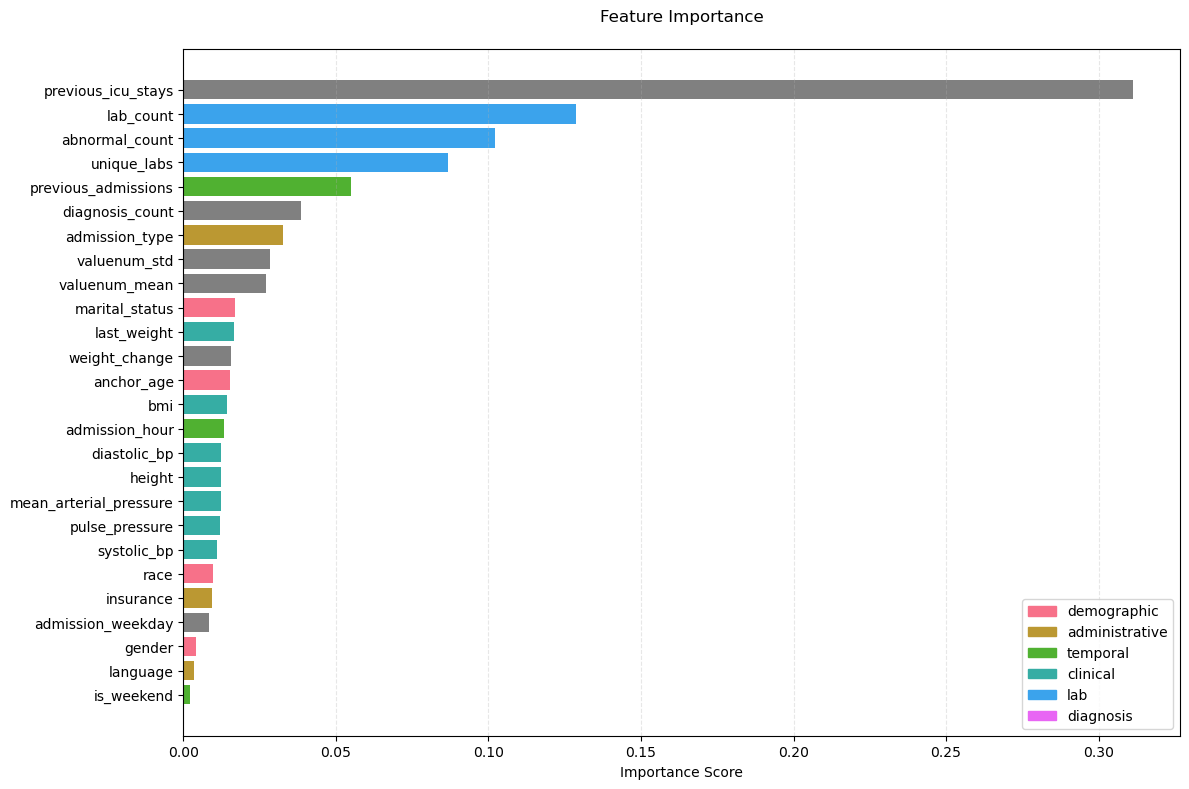

In [219]:
importance_df = plot_feature_importance(model, feature_names, feature_groups)
plt.show()

In [220]:
y_test, y_pred, y_pred_proba = prediction_data
error_analysis = analyze_errors(y_test, y_pred, y_pred_proba, X, feature_groups)

# Print overall metrics
print("\nModel Performance:")
print(f"Test F1 Score: {metrics['test']['f1']:.3f}")
print(f"Test Recall: {metrics['test']['recall']:.3f}")
print(f"Test Precision: {metrics['test']['precision']:.3f}")
print(f"Test AUC-ROC: {metrics['test']['auc_roc']:.3f}")


Error Analysis by Feature Group:

Demographic Features:
          gender  anchor_age       race  marital_status
count  40.000000   40.000000  40.000000       40.000000
mean    0.072440    0.375641   0.160348        0.259893
std     1.015393    0.913860   0.904561        1.059919
min    -0.930181   -1.635854  -2.265433       -1.655329
25%    -0.930181   -0.197169   0.619858       -0.848920
50%     0.072440    0.442247   0.619858        0.763899
75%     1.075060    1.188232   0.619858        0.965501
max     1.075060    1.827647   0.619858        1.570308

Administrative Features:
       admission_type  insurance   language
count       40.000000  40.000000  40.000000
mean        -0.085808  -0.026215  -0.018275
std          0.842862   0.909076   0.963218
min         -2.257212  -1.125596  -0.564869
25%         -0.001207  -0.514829  -0.261206
50%         -0.001207  -0.514829  -0.261206
75%         -0.001207   1.317472  -0.261206
max          1.690796   1.317472   3.990080

Temporal Feature

## Random Forest Prototype Data

<!-- ### ICU Admission Prediction: Understanding Predictive Features

## Current Feature Set Analysis

### 1. Demographic Indicators
* **Age**
  * Strong predictor of ICU admission risk
  * Elderly patients have higher likelihood of requiring critical care
  * Age-related comorbidities increase complexity

* **Gender**
  * Certain conditions have gender-specific risk factors
  * Can influence treatment responses
  * May indicate different physiological reserves

* **Race**
  * Correlates with specific health disparities
  * Can indicate genetic predisposition to certain conditions
  * May influence treatment effectiveness

### 2. Socioeconomic Indicators

* **Insurance Type**
  * Indicates access to preventive care
  * May reflect delayed medical attention
  * Correlates with overall health management

* **Marital Status**
  * Proxy for social support system
  * Can affect post-discharge care options
  * Influences treatment compliance

### 3. Clinical Indicators

* **Lab Tests**
  * **Total Count (lab_count)**
    * Higher counts often indicate more complex cases
    * Shows intensity of monitoring needed
  
  * **Unique Labs (unique_labs)**
    * Indicates diversity of medical concerns
    * Shows complexity of diagnostic process
  
  * **Abnormal Results (abnormal_count)**
    * Direct indicator of health status
    * Multiple abnormalities often precede ICU admission
  
  * **Value Statistics (mean, std)**
    * Trends in lab values show disease progression
    * Variability can indicate instability

* **Diagnoses Count**
  * Multiple diagnoses indicate complexity
  * Comorbidities increase ICU risk
  * Shows overall disease burden

### 4. Administrative Data

* **Admission Type**
  * Emergency admissions have higher ICU risk
  * Planned vs unplanned affects outcomes
  * Indicates initial severity assessment

* **Admission Timing**
  * Time patterns can indicate urgency
  * Weekend vs weekday admissions differ in risk
  * Seasonal patterns may be relevant

## Recommended Additional Features

### 1. Vital Signs
* Blood Pressure (systolic/diastolic)
* Heart Rate
* Respiratory Rate
* Temperature
* Oxygen Saturation
* Glasgow Coma Scale

### 2. Specific Lab Values
* **Blood Gases**
  * pH
  * pO2
  * pCO2
  * Bicarbonate

* **Critical Labs**
  * Lactate
  * Creatinine
  * White Blood Cell Count
  * Platelet Count
  * Hemoglobin
  * Blood Glucose

### 3. Temporal Features
* Time since last hospitalization
* Frequency of admissions in past year
* Length of previous hospital stays
* Time pattern of lab value changes
* Rate of vital sign changes

### 4. Medication History
* Number of active medications
* Classes of medications
* Recent medication changes
* Response to previous treatments

### 5. Specific Diagnoses
* Cardiovascular conditions
* Respiratory conditions
* Sepsis indicators
* Organ failure markers
* Trauma severity scores

## Implementation Recommendations

1. **Data Processing Priority**
   * Start with basic demographics and admission data
   * Add lab values and vital signs next
   * Incorporate temporal features last

2. **Feature Engineering Steps**
   * Convert all timestamps to consistent format
   * Calculate time-based features
   * Create aggregate statistics for lab values
   * Generate interaction terms for key features

3. **Missing Data Strategy**
   * Use multiple imputation for critical variables
   * Create binary flags for missing values
   * Consider temporal aspects in imputation

4. **Validation Approach**
   * Use temporal validation (train on earlier data, test on later)
   * Stratify by key demographic factors
   * Consider hospital unit-specific validation

## Conclusion

While the current feature set provides a good foundation, incorporating additional clinical indicators, especially vital signs and specific lab values, would likely improve predictive power significantly. The temporal aspects of patient data are particularly important for ICU prediction and should be prioritized in future iterations. -->

In [159]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def process_omr_measurements(omr_df, admissions_df):
    """
    Process OMR measurements with the given data format
    """
    # Convert chartdate to datetime
    omr_df['chartdate'] = pd.to_datetime(omr_df['chartdate'])
    admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
    
    vital_measurements = []
    
    for _, admission in admissions_df.iterrows():
        # Get measurements before admission
        patient_vitals = omr_df[
            (omr_df['subject_id'] == admission['subject_id']) &
            (omr_df['chartdate'] <= admission['admittime'])
        ]
        
        if len(patient_vitals) == 0:
            continue
            
        # Initialize measurements dictionary
        measurements = {
            'subject_id': admission['subject_id'],
            'hadm_id': admission['hadm_id']
        }
        
        # Process each type of measurement
        # Weight
        weight_measures = patient_vitals[patient_vitals['result_name'] == 'Weight (Lbs)']
        if not weight_measures.empty:
            measurements['last_weight'] = float(weight_measures.iloc[-1]['result_value'])
            if len(weight_measures) > 1:
                measurements['weight_change'] = float(weight_measures.iloc[-1]['result_value']) - float(weight_measures.iloc[0]['result_value'])
        
        # Height
        height_measures = patient_vitals[patient_vitals['result_name'] == 'Height (Inches)']
        if not height_measures.empty:
            measurements['height'] = float(height_measures.iloc[-1]['result_value'])
        
        # BMI
        bmi_measures = patient_vitals[patient_vitals['result_name'] == 'BMI (kg/m2)']
        if not bmi_measures.empty:
            measurements['bmi'] = float(bmi_measures.iloc[-1]['result_value'])
        elif 'height' in measurements and 'last_weight' in measurements:
            # Calculate BMI if not directly available
            weight_kg = measurements['last_weight'] * 0.453592  # Convert lbs to kg
            height_m = measurements['height'] * 0.0254  # Convert inches to meters
            measurements['bmi'] = weight_kg / (height_m ** 2)
        
        # Blood Pressure
        bp_measures = patient_vitals[patient_vitals['result_name'] == 'Blood Pressure']
        if not bp_measures.empty:
            last_bp = bp_measures.iloc[-1]['result_value'].split('/')
            if len(last_bp) == 2:
                measurements['systolic_bp'] = float(last_bp[0])
                measurements['diastolic_bp'] = float(last_bp[1])
        
        vital_measurements.append(measurements)
    
    return pd.DataFrame(vital_measurements)

def create_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diagnoses_df, omr_df, n_patients=100):
    """
    Create a prototype dataset with n_patients for quick analysis
    """
    # 1. Load patients first to get a sample
    print("Loading patients data...")
    # patients_df = pd.read_csv(f"{hospital_data_path}/patients.csv")
    sample_patients = patients_df['subject_id'].sample(n=n_patients, random_state=42)
    
    # 2. Load and filter other datasets
    print("Loading admissions data...")
    # admissions_df = pd.read_csv(f"{hospital_data_path}/admissions.csv")
    admissions_df = admissions_df[admissions_df['subject_id'].isin(sample_patients)]
    
    print("Loading transfers data...")
    # transfers_df = pd.read_csv(f"{hospital_data_path}/transfers.csv")
    transfers_df = transfers_df[transfers_df['subject_id'].isin(sample_patients)]
    
    print("Loading lab events data...")
    # labevents_df = pd.read_csv(f"{hospital_data_path}/labevents.csv")
    labevents_df = labevents_df[labevents_df['subject_id'].isin(sample_patients)]
    
    print("Loading diagnoses data...")
    # diagnoses_df = pd.read_csv(f"{hospital_data_path}/diagnoses_icd.csv")
    diagnoses_df = diagnoses_df[diagnoses_df['subject_id'].isin(sample_patients)]
    
    # 3. Convert datetime columns
    datetime_cols = {
        'admissions': ['admittime', 'dischtime', 'deathtime'],
        'transfers': ['intime', 'outtime'],
        'labevents': ['charttime'],
        'omr': ['chartdate']
    }
    
    for col in datetime_cols['admissions']:
        admissions_df[col] = pd.to_datetime(admissions_df[col])
    for col in datetime_cols['transfers']:
        transfers_df[col] = pd.to_datetime(transfers_df[col])
    for col in datetime_cols['labevents']:
        labevents_df[col] = pd.to_datetime(labevents_df[col])
    for col in datetime_cols['omr']:
        omr_df[col] = pd.to_datetime(omr_df[col])
    
    # 4. Create ICU labels
    print("Creating ICU labels...")
    icu_units = [
        "Medical Intensive Care Unit (MICU)",
        "Surgical Intensive Care Unit (SICU)",
        "Medical/Surgical Intensive Care Unit (MICU/SICU)",
        "Cardiac Vascular Intensive Care Unit (CVICU)",
        "Neuro Surgical Intensive Care Unit (Neuro SICU)",
        "Trauma SICU (TSICU)",
        "Intensive Care Unit (ICU)"
    ]
    
    icu_transfers = transfers_df[transfers_df['careunit'].isin(icu_units)]
    first_icu = icu_transfers.groupby(['subject_id', 'hadm_id'])['intime'].min().reset_index()
    first_icu['is_icu_patient'] = 1
    
    # 5. Process lab events
    print("Processing lab events...")
    lab_features = []
    
    for _, admission in admissions_df.iterrows():
        admission_labs = labevents_df[
            (labevents_df['subject_id'] == admission['subject_id']) &
            (labevents_df['hadm_id'] == admission['hadm_id'])
        ]
        
        if len(admission_labs) > 0:
            stats = {
                'subject_id': admission['subject_id'],
                'hadm_id': admission['hadm_id'],
                'lab_count': len(admission_labs),
                'unique_labs': admission_labs['itemid'].nunique(),
                'abnormal_count': (admission_labs['flag'] == 'abnormal').sum(),
                'valuenum_mean': admission_labs['valuenum'].mean(),
                'valuenum_std': admission_labs['valuenum'].std()
            }
            lab_features.append(stats)
    
    lab_features_df = pd.DataFrame(lab_features)
    
    print("Processing vital measurements...")
    vital_features = process_omr_measurements(omr_df, admissions_df)
    
    # 6. Process diagnoses
    print("Processing diagnoses...")
    diagnosis_counts = diagnoses_df.groupby(['subject_id', 'hadm_id']).size().reset_index()
    diagnosis_counts.columns = ['subject_id', 'hadm_id', 'diagnosis_count']
    
    # 7. Create final dataset
    print("Creating final dataset...")
    # Start with admissions as base
    final_df = admissions_df[['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'insurance', 'language', 'marital_status', 'race']]
    
    # Add patient demographics
    final_df = final_df.merge(
        patients_df[['subject_id', 'gender', 'anchor_age']],
        on='subject_id',
        how='left'
    )
    
    # Add ICU labels
    final_df = final_df.merge(
        first_icu[['subject_id', 'hadm_id', 'is_icu_patient']],
        on=['subject_id', 'hadm_id'],
        how='left'
    )
    final_df['is_icu_patient'] = final_df['is_icu_patient'].fillna(0)
    
    # Add lab features
    final_df = final_df.merge(
        lab_features_df,
        on=['subject_id', 'hadm_id'],
        how='left'
    )
    
    # Add diagnosis counts
    final_df = final_df.merge(
        diagnosis_counts,
        on=['subject_id', 'hadm_id'],
        how='left'
    )
    
    final_df = final_df.merge(
        vital_features,
        on=['subject_id', 'hadm_id'],
        how='left'
    )
    
    # Fill missing values
    final_df = final_df.fillna({
        'lab_count': 0,
        'unique_labs': 0,
        'abnormal_count': 0,
        'diagnosis_count': 0
    })
    
    vital_columns = ['last_weight', 'weight_change', 'height', 'bmi',
                    'systolic_bp', 'diastolic_bp']
    
    for col in vital_columns:
        if col in final_df.columns:
            final_df[col] = final_df[col].fillna(final_df[col].median())
    
    print("Done! Final dataset shape:", final_df.shape)
    return final_df

# Example usage:
'''
# Set your path
hospital_data_path = "/path/to/mimic/hosp"

# Create prototype dataset
prototype_df = create_prototype_dataset(hospital_data_path, n_patients=100)

# Show sample of the data
print(prototype_df.head())

# Basic statistics
print("\nFeature statistics:")
print(prototype_df.describe())

# Check class distribution
print("\nICU vs Non-ICU distribution:")
print(prototype_df['is_icu_patient'].value_counts(normalize=True))
'''

'\n# Set your path\nhospital_data_path = "/path/to/mimic/hosp"\n\n# Create prototype dataset\nprototype_df = create_prototype_dataset(hospital_data_path, n_patients=100)\n\n# Show sample of the data\nprint(prototype_df.head())\n\n# Basic statistics\nprint("\nFeature statistics:")\nprint(prototype_df.describe())\n\n# Check class distribution\nprint("\nICU vs Non-ICU distribution:")\nprint(prototype_df[\'is_icu_patient\'].value_counts(normalize=True))\n'

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

def preprocess_imbalanced_data(df):
    """
    Preprocess the imbalanced dataset for ICU prediction
    """
    # 1. Create copy and check class distribution
    data = df.copy()
    print("Class distribution before preprocessing:")
    print(data['is_icu_patient'].value_counts(normalize=True))
    
    # 2. Separate target variable
    y = data['is_icu_patient']
    
    # 3. Drop non-feature columns
    columns_to_drop = ['subject_id', 'hadm_id', 'is_icu_patient', 'admittime', 'dischtime']
    X = data.drop(columns=columns_to_drop)
    
    # 4. Handle categorical variables
    categorical_columns = X.select_dtypes(include=['object']).columns
    label_encoders = {}
    
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column].fillna('MISSING'))
    
    # 5. Handle numerical variables
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values
    imputer = SimpleImputer(strategy='median')
    X[numerical_columns] = imputer.fit_transform(X[numerical_columns])
    
    # 6. Scale numerical features
    scaler = StandardScaler()
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    
    return X, y, X.columns.tolist()

def train_evaluate_imbalanced(X, y):
    """
    Train and evaluate model with handling for imbalanced data
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Create pipeline with SMOTE
    pipeline = imbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(
            n_estimators=200,
            class_weight='balanced',
            random_state=42
        ))
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'train': {
            'f1': f1_score(y_train, y_pred_train),
            'recall': recall_score(y_train, y_pred_train),
            'precision': precision_score(y_train, y_pred_train)
        },
        'test': {
            'f1': f1_score(y_test, y_pred_test),
            'recall': recall_score(y_test, y_pred_test),
            'precision': precision_score(y_test, y_pred_test)
        }
    }
    
    # Print detailed classification report
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))
    
    return pipeline, metrics

def cross_validate_model(X, y, n_splits=5):
    """
    Perform cross-validation with appropriate metrics
    """
    # Create pipeline
    pipeline = imbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(
            n_estimators=200,
            class_weight='balanced',
            random_state=42
        ))
    ])
    
    # Define scoring metrics
    scoring = {
        'f1': 'f1',
        'recall': 'recall',
        'precision': 'precision'
    }
    
    # Perform cross-validation
    cv_results = cross_validate(
        pipeline, X, y,
        cv=n_splits,
        scoring=scoring,
        return_train_score=True
    )
    
    # Print cross-validation results
    print("\nCross-validation results:")
    for metric in scoring.keys():
        train_scores = cv_results[f'train_{metric}']
        test_scores = cv_results[f'test_{metric}']
        print(f"\n{metric.upper()}:")
        print(f"Train: {train_scores.mean():.3f} (+/- {train_scores.std() * 2:.3f})")
        print(f"Test: {test_scores.mean():.3f} (+/- {test_scores.std() * 2:.3f})")
    
    return cv_results

def get_feature_importance(model, feature_names):
    """
    Get feature importance from the trained model
    """
    # Extract the Random Forest classifier from the pipeline
    rf_model = model.named_steps['classifier']
    
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    })
    
    return importance.sort_values('importance', ascending=False)

# Example usage:
"""
# Create and preprocess dataset
prototype_df = create_prototype_dataset(hospital_data_path, n_patients=100)
X, y, feature_names = preprocess_imbalanced_data(prototype_df)

# Train and evaluate model
model, metrics = train_evaluate_imbalanced(X, y)

print("\nModel Performance:")
print("Training F1 Score:", metrics['train']['f1'])
print("Training Recall:", metrics['train']['recall'])
print("Test F1 Score:", metrics['test']['f1'])
print("Test Recall:", metrics['test']['recall'])

# Perform cross-validation
cv_results = cross_validate_model(X, y)

# Get feature importance
importance_df = get_feature_importance(model, feature_names)
print("\nTop 10 most important features:")
print(importance_df.head(10))
"""

'\n# Create and preprocess dataset\nprototype_df = create_prototype_dataset(hospital_data_path, n_patients=100)\nX, y, feature_names = preprocess_imbalanced_data(prototype_df)\n\n# Train and evaluate model\nmodel, metrics = train_evaluate_imbalanced(X, y)\n\nprint("\nModel Performance:")\nprint("Training F1 Score:", metrics[\'train\'][\'f1\'])\nprint("Training Recall:", metrics[\'train\'][\'recall\'])\nprint("Test F1 Score:", metrics[\'test\'][\'f1\'])\nprint("Test Recall:", metrics[\'test\'][\'recall\'])\n\n# Perform cross-validation\ncv_results = cross_validate_model(X, y)\n\n# Get feature importance\nimportance_df = get_feature_importance(model, feature_names)\nprint("\nTop 10 most important features:")\nprint(importance_df.head(10))\n'

In [200]:
prototype_df = create_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients=5000)
prototype_df

Loading patients data...
Loading admissions data...
Loading transfers data...
Loading lab events data...
Loading diagnoses data...
Creating ICU labels...
Processing lab events...
Processing vital measurements...
Processing diagnoses...
Creating final dataset...
Done! Final dataset shape: (7474, 24)


,subject_id,hadm_id,admittime,dischtime,admission_type,insurance,language,marital_status,race,gender,...,abnormal_count,valuenum_mean,valuenum_std,diagnosis_count,last_weight,systolic_bp,diastolic_bp,height,bmi,weight_change
0,10002425,20822132,2153-01-07 00:00:00,2153-01-08 16:30:00,DIRECT OBSERVATION,Medicare,English,SINGLE,WHITE,F,...,3.0,39.790750,57.782109,3.0,115.0,110.0,72.0,65.5,28.1,-2.45
1,10006825,24019717,2150-08-03 01:03:00,2150-08-03 05:25:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,3.0,47.719583,87.091570,1.0,171.7,126.0,72.0,65.5,28.1,-2.45
2,10006825,24055420,2155-09-23 02:23:00,2155-09-23 05:32:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,7.0,37.814138,66.769647,2.0,152.8,126.0,72.0,59.5,30.3,-2.45
3,10006825,24767236,2155-09-23 05:37:00,2155-09-29 12:47:00,URGENT,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,0.0,53.553000,108.295607,4.0,152.8,126.0,72.0,59.5,30.3,-2.45
4,10006825,26690696,2157-05-28 07:24:00,2157-05-28 17:41:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,0.0,NaN,NaN,2.0,152.8,126.0,72.0,59.5,30.3,-2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,19989051,24625624,2186-09-17 22:37:00,2186-09-18 10:38:00,EU OBSERVATION,Private,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,0.0,NaN,NaN,6.0,171.7,126.0,72.0,65.5,28.1,-2.45
7470,19991773,24714953,2166-07-07 00:25:00,2166-07-09 13:14:00,SURGICAL SAME DAY ADMISSION,Private,English,SINGLE,WHITE - OTHER EUROPEAN,F,...,0.0,40.100000,0.424264,12.0,280.0,118.0,72.0,63.0,49.6,-2.45
7471,19991798,26825654,2129-09-03 07:11:00,2129-09-07 13:15:00,URGENT,Private,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,1.0,46.566364,57.631929,8.0,270.0,139.0,89.0,64.0,46.3,55.40
7472,19996016,28015466,2159-12-10 11:10:00,2159-12-15 16:00:00,URGENT,Private,English,MARRIED,WHITE,F,...,2.0,49.945667,99.935084,18.0,222.0,126.0,72.0,65.5,32.8,-2.45


In [201]:
prototype_df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type',
       'insurance', 'language', 'marital_status', 'race', 'gender',
       'anchor_age', 'is_icu_patient', 'lab_count', 'unique_labs',
       'abnormal_count', 'valuenum_mean', 'valuenum_std', 'diagnosis_count',
       'last_weight', 'systolic_bp', 'diastolic_bp', 'height', 'bmi',
       'weight_change'],
      dtype='object')

In [202]:
prototype_df[prototype_df.is_icu_patient == 1]

,subject_id,hadm_id,admittime,dischtime,admission_type,insurance,language,marital_status,race,gender,...,abnormal_count,valuenum_mean,valuenum_std,diagnosis_count,last_weight,systolic_bp,diastolic_bp,height,bmi,weight_change
7,10012206,23961896,2127-07-04 01:16:00,2127-07-14 17:00:00,OBSERVATION ADMIT,Private,English,MARRIED,WHITE,M,...,161.0,50.507693,114.498731,19.0,171.7,126.0,72.0,65.5,28.1,-2.45
25,10031229,21363234,2128-09-08 22:24:00,2128-09-13 18:12:00,OBSERVATION ADMIT,Medicare,English,NaN,UNKNOWN,M,...,84.0,32.997765,44.989855,18.0,171.7,126.0,72.0,65.5,28.1,-2.45
37,10046436,23594537,2153-12-27 05:28:00,2154-01-01 18:05:00,URGENT,Private,English,SINGLE,WHITE,M,...,3.0,40.461765,51.764532,9.0,171.7,126.0,72.0,65.5,28.1,-2.45
43,10059278,21222443,2122-08-20 22:48:00,2122-08-30 15:47:00,URGENT,Medicaid,English,NaN,UNABLE TO OBTAIN,M,...,34.0,32.692283,55.192533,11.0,171.7,126.0,72.0,65.5,28.1,-2.45
64,10118141,20117182,2178-05-25 23:47:00,2178-05-28 13:50:00,OBSERVATION ADMIT,Medicare,English,NaN,UNKNOWN,M,...,216.0,277.947617,1250.442015,28.0,171.7,126.0,72.0,65.5,28.1,-2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431,19936193,29898007,2189-10-16 21:27:00,2189-10-19 16:48:00,EW EMER.,Private,English,SINGLE,WHITE,M,...,11.0,38.435294,54.146020,8.0,251.0,132.0,70.0,68.5,37.6,4.00
7434,19936782,28486132,2154-02-09 09:01:00,2154-02-16 14:18:00,EW EMER.,Medicare,English,WIDOWED,WHITE,F,...,23.0,44.650116,66.376997,8.0,171.7,126.0,72.0,65.5,28.1,-2.45
7448,19963323,25532202,2171-04-30 16:42:00,2171-05-10 13:55:00,EW EMER.,Medicare,English,DIVORCED,WHITE,F,...,80.0,49.840651,80.409614,14.0,171.7,126.0,72.0,65.5,28.1,-2.45
7450,19965443,24512586,2162-10-23 14:00:00,2162-11-01 15:51:00,EW EMER.,Medicare,English,WIDOWED,WHITE,F,...,102.0,49.532557,76.688393,23.0,122.0,128.0,97.0,60.0,23.8,-2.45


In [204]:
X, y, feature_names = preprocess_imbalanced_data(prototype_df)

Class distribution before preprocessing:
is_icu_patient
0.0    0.861921
1.0    0.138079
Name: proportion, dtype: float64


In [205]:
model, metrics = train_evaluate_imbalanced(X, y)

print("\nModel Performance:")
print("Training F1 Score:", metrics['train']['f1'])
print("Training Recall:", metrics['train']['recall'])
print("Test F1 Score:", metrics['test']['f1'])
print("Test Recall:", metrics['test']['recall'])


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      1289
         1.0       0.52      0.65      0.58       206

    accuracy                           0.87      1495
   macro avg       0.73      0.78      0.75      1495
weighted avg       0.88      0.87      0.87      1495


Model Performance:
Training F1 Score: 1.0
Training Recall: 1.0
Test F1 Score: 0.575107296137339
Test Recall: 0.6504854368932039


In [206]:
cv_results = cross_validate_model(X, y)


Cross-validation results:

F1:
Train: 1.000 (+/- 0.000)
Test: 0.555 (+/- 0.045)

RECALL:
Train: 1.000 (+/- 0.000)
Test: 0.622 (+/- 0.070)

PRECISION:
Train: 1.000 (+/- 0.000)
Test: 0.502 (+/- 0.034)


In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_feature_importance(importance_df, n_features=20, figsize=(12, 8)):
    """
    Plot feature importance as a horizontal bar chart
    
    Parameters:
    -----------
    importance_df : DataFrame
        DataFrame containing 'feature' and 'importance' columns
    n_features : int
        Number of top features to display
    figsize : tuple
        Figure size (width, height)
    """
    # Sort and get top n features
    top_features = importance_df.nlargest(n_features, 'importance').copy()
    
    # Create horizontal bar plot
    plt.figure(figsize=figsize)
    
    # Set style
    # plt.style.use('seaborn')
    
    # Create colormap
    colors = sns.color_palette("husl", n_features)
    
    # Create horizontal bars
    bars = plt.barh(
        y=range(len(top_features)),
        width=top_features['importance'],
        color=colors,
        alpha=0.8
    )
    
    # Customize plot
    plt.title('Top Feature Importance', pad=20, fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    
    # Set y-axis labels (feature names)
    plt.yticks(
        range(len(top_features)),
        top_features['feature'],
        fontsize=10
    )
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(
            width, 
            bar.get_y() + bar.get_height()/2,
            f'{width:.3f}',
            ha='left',
            va='center',
            fontsize=10,
        )
    
    # Adjust layout
    plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return plt.gcf()

def plot_feature_importance_categories(importance_df, categories, figsize=(12, 6)):
    """
    Plot feature importance grouped by categories
    
    Parameters:
    -----------
    importance_df : DataFrame
        DataFrame containing feature importance
    categories : dict
        Dictionary mapping category names to lists of feature names
    figsize : tuple
        Figure size (width, height)
    """
    # Calculate category importance
    category_importance = {}
    for category, features in categories.items():
        matching_features = [f for f in features if f in importance_df['feature'].values]
        if matching_features:
            category_importance[category] = importance_df[
                importance_df['feature'].isin(matching_features)
            ]['importance'].sum()
    
    # Create DataFrame for plotting
    cat_df = pd.DataFrame({
        'category': list(category_importance.keys()),
        'importance': list(category_importance.values())
    }).sort_values('importance', ascending=True)
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Set style
    # plt.style.use('seaborn')
    
    # Create colormap
    colors = sns.color_palette("husl", len(category_importance))
    
    # Create horizontal bars
    bars = plt.barh(
        y=range(len(cat_df)),
        width=cat_df['importance'],
        color=colors,
        alpha=0.8
    )
    
    # Customize plot
    plt.title('Feature Importance by Category', pad=20, fontsize=14)
    plt.xlabel('Total Importance Score', fontsize=12)
    
    # Set y-axis labels (category names)
    plt.yticks(
        range(len(cat_df)),
        cat_df['category'],
        fontsize=10
    )
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(
            width,
            bar.get_y() + bar.get_height()/2,
            f'{width:.3f}',
            ha='left',
            va='center',
            fontsize=10,
        )
    
    # Adjust layout
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return plt.gcf()

# Example usage:
"""
# Assuming you have your importance DataFrame
# For individual features
plot_feature_importance(importance_df, n_features=15)
plt.show()

# For feature categories
categories = {
    'Demographics': ['gender', 'anchor_age', 'race', 'marital_status'],
    'Vitals': ['last_weight', 'height', 'bmi', 'systolic_bp', 'diastolic_bp'],
    'Labs': ['lab_count', 'unique_labs', 'abnormal_count'],
    'Administrative': ['admission_type', 'insurance', 'language'],
    'Temporal': ['admission_hour', 'is_weekend', 'previous_admissions']
}

plot_feature_importance_categories(importance_df, categories)
plt.show()
"""

"\n# Assuming you have your importance DataFrame\n# For individual features\nplot_feature_importance(importance_df, n_features=15)\nplt.show()\n\n# For feature categories\ncategories = {\n    'Demographics': ['gender', 'anchor_age', 'race', 'marital_status'],\n    'Vitals': ['last_weight', 'height', 'bmi', 'systolic_bp', 'diastolic_bp'],\n    'Labs': ['lab_count', 'unique_labs', 'abnormal_count'],\n    'Administrative': ['admission_type', 'insurance', 'language'],\n    'Temporal': ['admission_hour', 'is_weekend', 'previous_admissions']\n}\n\nplot_feature_importance_categories(importance_df, categories)\nplt.show()\n"

In [208]:
importance_df = get_feature_importance(model, feature_names)
print("\nTop 10 most important features:")
print(importance_df.head(10))


Top 10 most important features:
            feature  importance
7         lab_count    0.176199
9    abnormal_count    0.162764
8       unique_labs    0.114773
0    admission_type    0.074326
12  diagnosis_count    0.071878
10    valuenum_mean    0.055526
11     valuenum_std    0.052386
6        anchor_age    0.043765
13      last_weight    0.032356
17              bmi    0.030496


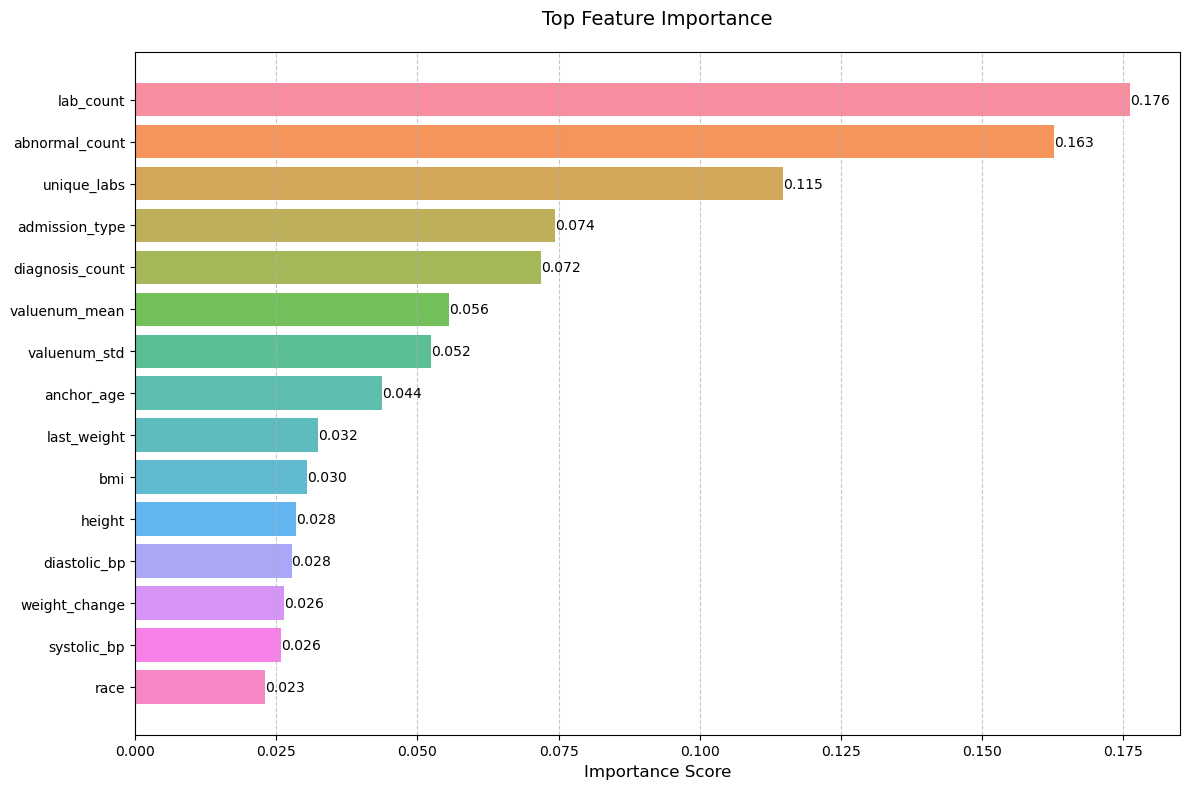

In [209]:
plot_feature_importance(importance_df, n_features=15)
plt.show()

## Neural Networks - PyTorch v1

In [129]:
prototype_df = create_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients=5000)

Loading patients data...
Loading admissions data...
Loading transfers data...
Loading lab events data...
Loading diagnoses data...
Creating ICU labels...
Processing lab events...
Processing vital measurements...
Processing diagnoses...
Creating final dataset...
Done! Final dataset shape: (7474, 24)


In [132]:
prototype_df.head()

,subject_id,hadm_id,admittime,dischtime,admission_type,insurance,language,marital_status,race,gender,...,abnormal_count,valuenum_mean,valuenum_std,diagnosis_count,last_weight,systolic_bp,diastolic_bp,height,bmi,weight_change
0,10002425,20822132,2153-01-07 00:00:00,2153-01-08 16:30:00,DIRECT OBSERVATION,Medicare,English,SINGLE,WHITE,F,...,3.0,39.790750,57.782109,3.0,115.0,110.0,72.0,65.5,28.1,-2.45
1,10006825,24019717,2150-08-03 01:03:00,2150-08-03 05:25:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,3.0,47.719583,87.091570,1.0,171.7,126.0,72.0,65.5,28.1,-2.45
2,10006825,24055420,2155-09-23 02:23:00,2155-09-23 05:32:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,7.0,37.814138,66.769647,2.0,152.8,126.0,72.0,59.5,30.3,-2.45
3,10006825,24767236,2155-09-23 05:37:00,2155-09-29 12:47:00,URGENT,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,0.0,53.553000,108.295607,4.0,152.8,126.0,72.0,59.5,30.3,-2.45
4,10006825,26690696,2157-05-28 07:24:00,2157-05-28 17:41:00,EU OBSERVATION,Medicaid,English,SINGLE,BLACK/AFRICAN AMERICAN,F,...,0.0,NaN,NaN,2.0,152.8,126.0,72.0,59.5,30.3,-2.45


In [133]:
print("Initial shape:", prototype_df.shape)
print("\nClass distribution before preprocessing:")
print(prototype_df['is_icu_patient'].value_counts(normalize=True))

Initial shape: (7474, 24)

Class distribution before preprocessing:
is_icu_patient
0.0    0.861921
1.0    0.138079
Name: proportion, dtype: float64


In [134]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

class ICUDataset(Dataset):
    """
    Custom Dataset for ICU prediction
    """
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

class ICUPredictor(nn.Module):
    """
    Neural Network for ICU prediction
    """
    def __init__(self, input_size, hidden_sizes=[64, 32]):
        super(ICUPredictor, self).__init__()
        
        # Create layers
        layers = []
        prev_size = input_size
        
        for hidden_size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_size),
                nn.Dropout(0.2)
            ])
            prev_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

def preprocess_for_pytorch(df, test_size=0.2):
    """
    Preprocess the prototype dataset for PyTorch training
    """
    # Remove non-feature columns
    cols_to_drop = ['subject_id', 'hadm_id', 'admittime', 'dischtime']
    feature_df = df.drop(columns=cols_to_drop)
    
    # Separate target
    y = feature_df.pop('is_icu_patient').values
    
    # Handle categorical variables
    categorical_cols = feature_df.select_dtypes(include=['object']).columns
    label_encoders = {}
    
    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        feature_df[col] = label_encoders[col].fit_transform(feature_df[col].fillna('missing'))
    
    # Handle numerical variables
    numerical_cols = feature_df.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    feature_df[numerical_cols] = scaler.fit_transform(
        feature_df[numerical_cols].fillna(feature_df[numerical_cols].median())
    )
    
    # Convert to numpy arrays
    X = feature_df.values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    
    # Create datasets
    train_dataset = ICUDataset(X_train, y_train)
    test_dataset = ICUDataset(X_test, y_test)
    
    return train_dataset, test_dataset, feature_df.columns.tolist()

def train_model(train_dataset, test_dataset, input_size, 
                batch_size=32, epochs=50, learning_rate=0.001):
    """
    Train the PyTorch model
    """
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    # Initialize model
    model = ICUPredictor(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        
        for batch_features, batch_targets in train_loader:
            # Forward pass
            outputs = model(batch_features)
            loss = criterion(outputs.squeeze(), batch_targets)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        # Calculate average training loss
        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Evaluate on test set
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_features, batch_targets in test_loader:
                outputs = model(batch_features)
                test_loss += criterion(outputs.squeeze(), batch_targets).item()
                
                predicted = (outputs.squeeze() > 0.5).float()
                total += batch_targets.size(0)
                correct += (predicted == batch_targets).sum().item()
        
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        test_accuracy = 100 * correct / total
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {avg_train_loss:.4f}')
            print(f'Test Loss: {avg_test_loss:.4f}')
            print(f'Test Accuracy: {test_accuracy:.2f}%\n')
    
    return model, train_losses, test_losses

def evaluate_model(model, test_dataset):
    """
    Evaluate the trained model
    """
    model.eval()
    test_loader = DataLoader(test_dataset, batch_size=32)
    
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for features, targets in test_loader:
            outputs = model(features)
            predicted = (outputs.squeeze() > 0.5).float()
            
            all_predictions.extend(predicted.numpy())
            all_targets.extend(targets.numpy())
    
    # Calculate metrics
    predictions = np.array(all_predictions)
    targets = np.array(all_targets)
    
    accuracy = (predictions == targets).mean()
    
    from sklearn.metrics import classification_report, roc_auc_score
    print("\nClassification Report:")
    print(classification_report(targets, predictions))
    
    auc_roc = roc_auc_score(targets, predictions)
    print(f"\nAUC-ROC Score: {auc_roc:.4f}")
    
    return predictions, targets

# Example usage:
"""
# Assuming you have your prototype dataset
prototype_df = create_prototype_dataset(hospital_data_path, n_patients=100)

# Preprocess data
train_dataset, test_dataset, feature_names = preprocess_for_pytorch(prototype_df)
input_size = len(feature_names)

# Train model
model, train_losses, test_losses = train_model(
    train_dataset, 
    test_dataset, 
    input_size,
    batch_size=32,
    epochs=50,
    learning_rate=0.001
)

# Evaluate model
predictions, targets = evaluate_model(model, test_dataset)

# Plot training progress
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
"""

"\n# Assuming you have your prototype dataset\nprototype_df = create_prototype_dataset(hospital_data_path, n_patients=100)\n\n# Preprocess data\ntrain_dataset, test_dataset, feature_names = preprocess_for_pytorch(prototype_df)\ninput_size = len(feature_names)\n\n# Train model\nmodel, train_losses, test_losses = train_model(\n    train_dataset, \n    test_dataset, \n    input_size,\n    batch_size=32,\n    epochs=50,\n    learning_rate=0.001\n)\n\n# Evaluate model\npredictions, targets = evaluate_model(model, test_dataset)\n\n# Plot training progress\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 5))\nplt.plot(train_losses, label='Training Loss')\nplt.plot(test_losses, label='Test Loss')\nplt.title('Training Progress')\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n"

In [135]:
train_dataset, test_dataset, feature_names = preprocess_for_pytorch(prototype_df)

In [136]:
input_size = len(feature_names)

In [137]:
input_size

19

In [138]:
model, train_losses, test_losses = train_model(
    train_dataset, 
    test_dataset, 
    input_size,
    batch_size=32,
    epochs=50,
    learning_rate=0.001
)

Epoch [10/50]
Train Loss: 0.2736
Test Loss: 0.2895
Test Accuracy: 87.22%

Epoch [20/50]
Train Loss: 0.2638
Test Loss: 0.2825
Test Accuracy: 88.16%

Epoch [30/50]
Train Loss: 0.2568
Test Loss: 0.2894
Test Accuracy: 87.83%

Epoch [40/50]
Train Loss: 0.2550
Test Loss: 0.2816
Test Accuracy: 88.56%

Epoch [50/50]
Train Loss: 0.2492
Test Loss: 0.2854
Test Accuracy: 88.16%



In [139]:
predictions, targets = evaluate_model(model, test_dataset)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1289
         1.0       0.67      0.28      0.39       206

    accuracy                           0.88      1495
   macro avg       0.78      0.63      0.66      1495
weighted avg       0.86      0.88      0.86      1495


AUC-ROC Score: 0.6275


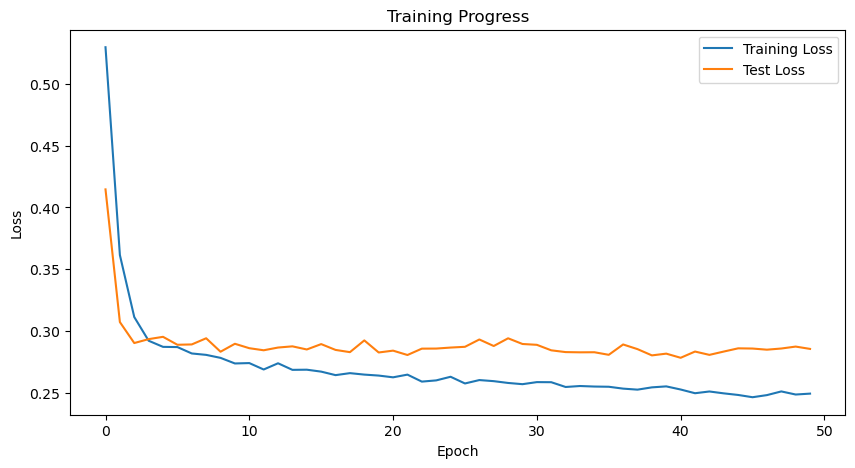

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Neural Networks - v2 Data

In [193]:
def create_enhanced_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients=100):
    """
    Create enhanced dataset with additional features and vital measurements
    """
    # Start with prototype dataset
    base_df = create_prototype_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients)
    
    print("\nEnhancing dataset with additional features...")
    
    # Add temporal features
    base_df['admission_hour'] = pd.to_datetime(base_df['admittime']).dt.hour
    base_df['admission_weekday'] = pd.to_datetime(base_df['admittime']).dt.weekday
    base_df['is_weekend'] = base_df['admission_weekday'].isin([5, 6]).astype(int)
    
    # Add derived vital features
    if 'systolic_bp' in base_df.columns and 'diastolic_bp' in base_df.columns:
        base_df['pulse_pressure'] = base_df['systolic_bp'] - base_df['diastolic_bp']
        base_df['mean_arterial_pressure'] = (
            (2 * base_df['diastolic_bp']) + base_df['systolic_bp']
        ) / 3
    
    if 'last_weight' in base_df.columns and 'height' in base_df.columns:
        # Add BMI if not already present
        if 'bmi' not in base_df.columns:
            weight_kg = base_df['last_weight'] * 0.453592
            height_m = base_df['height'] * 0.0254
            base_df['bmi'] = weight_kg / (height_m ** 2)
    
    # Add admission history features
    admission_history = base_df.groupby('subject_id').agg({
        'hadm_id': 'count',
        'is_icu_patient': 'sum'
    }).reset_index()
    
    admission_history.columns = ['subject_id', 'previous_admissions', 'previous_icu_stays']
    base_df = base_df.merge(admission_history, on='subject_id', how='left')
    
    print(f"Enhanced dataset shape: {base_df.shape}")
    return base_df

enhanced_df = create_enhanced_dataset(patients_df, admissions_df, transfers_df, labevents_df, diag_df, omr_df, n_patients=5000)

Loading patients data...
Loading admissions data...
Loading transfers data...
Loading lab events data...
Loading diagnoses data...
Creating ICU labels...
Processing lab events...
Processing vital measurements...
Processing diagnoses...
Creating final dataset...
Done! Final dataset shape: (7474, 24)

Enhancing dataset with additional features...
Enhanced dataset shape: (7474, 31)


In [194]:
print("Initial shape:", enhanced_df.shape)
print("\nClass distribution before preprocessing:")
print(enhanced_df['is_icu_patient'].value_counts(normalize=True))

Initial shape: (7474, 31)

Class distribution before preprocessing:
is_icu_patient
0.0    0.861921
1.0    0.138079
Name: proportion, dtype: float64


In [195]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

class ICUDataset(Dataset):
    """Custom Dataset for ICU prediction"""
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.FloatTensor(targets)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

class EnhancedICUPredictor(nn.Module):
    """Neural Network for ICU prediction"""
    def __init__(self, input_size, hidden_sizes=[128, 64, 32]):
        super(EnhancedICUPredictor, self).__init__()
        
        layers = []
        prev_size = input_size
        
        for hidden_size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_size),
                nn.Dropout(0.3)
            ])
            prev_size = hidden_size
        
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

def preprocess_enhanced_for_pytorch(df, test_size=0.2):
    """Preprocess the enhanced dataset for PyTorch training"""
    print("Starting preprocessing...")
    print(f"Initial shape: {df.shape}")
    
    # Group features
    temporal_cols = ['admission_hour', 'is_weekend', 'previous_admissions']
    vital_cols = ['last_weight', 'height', 'bmi', 'systolic_bp', 'diastolic_bp']
    lab_cols = ['lab_count', 'unique_labs', 'abnormal_count']
    categorical_cols = ['admission_type', 'insurance', 'language', 'marital_status',
                       'race', 'gender']
    
    # Remove non-feature columns
    cols_to_drop = ['subject_id', 'hadm_id', 'admittime', 'dischtime']
    feature_df = df.drop(columns=cols_to_drop)
    
    # Separate target
    y = feature_df.pop('is_icu_patient').values
    
    # Handle categorical variables
    label_encoders = {}
    for col in categorical_cols:
        if col in feature_df.columns:
            label_encoders[col] = LabelEncoder()
            feature_df[col] = label_encoders[col].fit_transform(feature_df[col].fillna('missing'))
    
    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = feature_df.select_dtypes(include=['float64', 'int64']).columns
    feature_df[numerical_cols] = scaler.fit_transform(
        feature_df[numerical_cols].fillna(feature_df[numerical_cols].median())
    )
    
    # Convert to numpy arrays
    X = feature_df.values
    
    print(f"Processed feature shape: {X.shape}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    
    # Create datasets
    train_dataset = ICUDataset(X_train, y_train)
    test_dataset = ICUDataset(X_test, y_test)
    
    return train_dataset, test_dataset, feature_df.columns.tolist()

def train_model(train_dataset, test_dataset, input_size, 
                batch_size=32, epochs=100, learning_rate=0.001):
    """Train the PyTorch model"""
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    # Initialize model
    model = EnhancedICUPredictor(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        epoch_loss = 0
        
        for batch_features, batch_targets in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = criterion(outputs.squeeze(), batch_targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_train_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Evaluation phase
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_features, batch_targets in test_loader:
                outputs = model(batch_features)
                test_loss += criterion(outputs.squeeze(), batch_targets).item()
                predicted = (outputs.squeeze() > 0.5).float()
                total += batch_targets.size(0)
                correct += (predicted == batch_targets).sum().item()
        
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        test_accuracy = 100 * correct / total
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {avg_train_loss:.4f}')
            print(f'Test Loss: {avg_test_loss:.4f}')
            print(f'Test Accuracy: {test_accuracy:.2f}%\n')
    
    return model, train_losses, test_losses

def evaluate_model(model, test_dataset):
    """Evaluate the trained model"""
    model.eval()
    test_loader = DataLoader(test_dataset, batch_size=32)
    
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for features, targets in test_loader:
            outputs = model(features)
            predicted = (outputs.squeeze() > 0.5).float()
            all_predictions.extend(predicted.numpy())
            all_targets.extend(targets.numpy())
    
    predictions = np.array(all_predictions)
    targets = np.array(all_targets)
    
    from sklearn.metrics import classification_report, roc_auc_score
    print("\nClassification Report:")
    print(classification_report(targets, predictions))
    
    auc_roc = roc_auc_score(targets, predictions)
    print(f"\nAUC-ROC Score: {auc_roc:.4f}")
    
    return predictions, targets

# Example usage:
"""
# Load and preprocess data
enhanced_df = create_enhanced_dataset(hospital_data_path, n_patients=100)
train_dataset, test_dataset, feature_names = preprocess_enhanced_for_pytorch(enhanced_df)
input_size = len(feature_names)

# Train model
model, train_losses, test_losses = train_model(
    train_dataset, 
    test_dataset, 
    input_size,
    batch_size=32,
    epochs=100,
    learning_rate=0.001
)

# Evaluate model
predictions, targets = evaluate_model(model, test_dataset)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
"""

"\n# Load and preprocess data\nenhanced_df = create_enhanced_dataset(hospital_data_path, n_patients=100)\ntrain_dataset, test_dataset, feature_names = preprocess_enhanced_for_pytorch(enhanced_df)\ninput_size = len(feature_names)\n\n# Train model\nmodel, train_losses, test_losses = train_model(\n    train_dataset, \n    test_dataset, \n    input_size,\n    batch_size=32,\n    epochs=100,\n    learning_rate=0.001\n)\n\n# Evaluate model\npredictions, targets = evaluate_model(model, test_dataset)\n\n# Plot results\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 5))\nplt.plot(train_losses, label='Training Loss')\nplt.plot(test_losses, label='Test Loss')\nplt.title('Training Progress')\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n"

In [196]:
train_dataset, test_dataset, feature_names = preprocess_enhanced_for_pytorch(enhanced_df)
input_size = len(feature_names)

Starting preprocessing...
Initial shape: (7474, 31)
Processed feature shape: (7474, 26)


In [197]:
model, train_losses, test_losses = train_model(
    train_dataset, 
    test_dataset, 
    input_size,
    batch_size=32,
    epochs=100,
    learning_rate=0.001
)

Epoch [10/100]
Train Loss: 0.1788
Test Loss: 0.1578
Test Accuracy: 93.51%

Epoch [20/100]
Train Loss: 0.1493
Test Loss: 0.1544
Test Accuracy: 93.31%

Epoch [30/100]
Train Loss: 0.1384
Test Loss: 0.1660
Test Accuracy: 92.24%

Epoch [40/100]
Train Loss: 0.1319
Test Loss: 0.1499
Test Accuracy: 93.71%

Epoch [50/100]
Train Loss: 0.1179
Test Loss: 0.1506
Test Accuracy: 93.85%

Epoch [60/100]
Train Loss: 0.1263
Test Loss: 0.1446
Test Accuracy: 93.58%

Epoch [70/100]
Train Loss: 0.1176
Test Loss: 0.1499
Test Accuracy: 93.85%

Epoch [80/100]
Train Loss: 0.1141
Test Loss: 0.1455
Test Accuracy: 93.91%

Epoch [90/100]
Train Loss: 0.1141
Test Loss: 0.1513
Test Accuracy: 94.31%

Epoch [100/100]
Train Loss: 0.1069
Test Loss: 0.1589
Test Accuracy: 93.85%



In [198]:
predictions, targets = evaluate_model(model, test_dataset)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      1289
         1.0       0.86      0.66      0.75       206

    accuracy                           0.94      1495
   macro avg       0.90      0.82      0.86      1495
weighted avg       0.94      0.94      0.93      1495


AUC-ROC Score: 0.8216


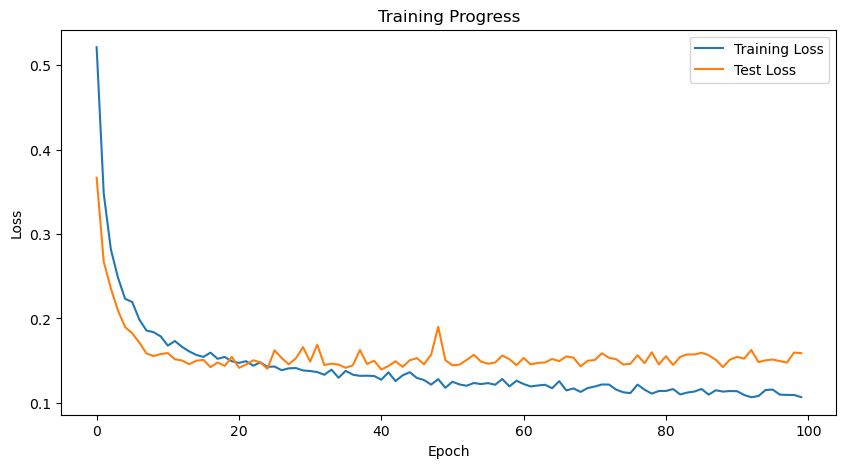

In [199]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Decision Trees

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def preprocess_data(df):
    """
    Preprocess the dataset with proper feature engineering
    """
    print("Starting preprocessing...")
    print("Initial shape:", df.shape)
    
    features_list = []
    
    for (subject_id, hadm_id), group in df.groupby(['subject_id', 'hadm_id']):
        try:
            features = {
                'subject_id': subject_id,
                'hadm_id': hadm_id,
                'age': group['anchor_age'].iloc[0] if not pd.isnull(group['anchor_age'].iloc[0]) else -1,
                'gender': group['gender'].iloc[0] if not pd.isnull(group['gender'].iloc[0]) else 'Unknown',
                'race': group['race'].iloc[0] if not pd.isnull(group['race'].iloc[0]) else 'Unknown'
            }
            
            # Process lab values
            lab_values = group[pd.notnull(group['valuenum'])]
            for itemid in lab_values['itemid'].unique():
                item_group = lab_values[lab_values['itemid'] == itemid]
                values = item_group['valuenum']
                
                # Check for abnormal values
                abnormal_count = 0
                for _, row in item_group.iterrows():
                    if (pd.notnull(row['ref_range_lower']) and 
                        pd.notnull(row['ref_range_upper']) and
                        (row['valuenum'] < row['ref_range_lower'] or 
                         row['valuenum'] > row['ref_range_upper'])):
                        abnormal_count += 1
                
                features.update({
                    f'lab_{itemid}_mean': values.mean(),
                    f'lab_{itemid}_min': values.min(),
                    f'lab_{itemid}_max': values.max(),
                    f'lab_{itemid}_abnormal_count': abnormal_count,
                    f'lab_{itemid}_total_count': len(values),
                })
            
            # Process diagnoses
            icd_codes = group['icd_code_x'].astype(str)
            features.update({
                'has_cardiovascular': int(icd_codes.str.startswith('I').any()),
                'has_respiratory': int(icd_codes.str.startswith('J').any()),
                'has_infection': int(icd_codes.str.startswith('A').any()),
                'has_injury': int(icd_codes.str.startswith('S').any()),
                'diagnosis_count': len(icd_codes.unique())
            })
            
            # Target variable
            icu_transfers = group[
                (group['eventtype'] == 'transfer') & 
                (group['careunit'].str.contains('ICU', na=False, case=False))
            ]
            features['ICU_Required'] = len(icu_transfers) > 0
            
            features_list.append(features)
            
        except Exception as e:
            print(f"Error processing admission {subject_id}-{hadm_id}: {str(e)}")
            continue
    
    result_df = pd.DataFrame(features_list)
    print("Processed shape:", result_df.shape)
    print("\nClass distribution:")
    print(result_df['ICU_Required'].value_counts(normalize=True))
    
    return result_df

def prepare_features(df):
    """
    Prepare features for modeling
    """
    # Create dummy variables
    categorical_cols = ['gender', 'race']
    df_encoded = pd.get_dummies(df, columns=categorical_cols)
    
    # Remove identifier columns
    feature_cols = [col for col in df_encoded.columns 
                   if col not in ['subject_id', 'hadm_id', 'ICU_Required']]
    
    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(
        imputer.fit_transform(df_encoded[feature_cols]),
        columns=feature_cols
    )
    
    # Scale features
    scaler = StandardScaler()
    X = pd.DataFrame(
        scaler.fit_transform(X),
        columns=feature_cols
    )
    
    y = df_encoded['ICU_Required']
    
    return X, y, feature_cols

def tune_hyperparameters(X_train, y_train, X_val, y_val):
    """
    Tune hyperparameters using validation set
    """
    print("\nTuning hyperparameters...")
    
    # Define parameter grid
    param_grid = {
        'max_depth': [3, 4, 5, 6, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced', None]
    }
    
    best_score = 0
    best_params = None
    
    # Grid search with validation set
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for class_weight in param_grid['class_weight']:
                    model = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        class_weight=class_weight,
                        random_state=42
                    )
                    
                    model.fit(X_train, y_train)
                    val_score = model.score(X_val, y_val)
                    
                    if val_score > best_score:
                        best_score = val_score
                        best_params = {
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'class_weight': class_weight
                        }
    
    print("Best parameters:", best_params)
    print("Best validation score:", best_score)
    
    return best_params

def evaluate_model(model, X_test, y_test, feature_names):
    """
    Evaluate model on test set
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print performance metrics
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Test Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=importance.head(20))
    plt.title('Top 20 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    return importance

def main():
    try:
        # Load data
        print("Loading data...")
        df = pd.read_csv("/Users/joannemathew/Desktop/Machine Learning Project/mimic-iv-3.1/hosp/combineddata.csv",
                        low_memory=False)
        
        # Preprocess data
        processed_df = preprocess_data(df)
        
        # Prepare features
        X, y, feature_cols = prepare_features(processed_df)
        
        # Split into train, validation, and test sets
        X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
        
        print("\nData split sizes:")
        print(f"Training set: {len(X_train)} samples")
        print(f"Validation set: {len(X_val)} samples")
        print(f"Test set: {len(X_test)} samples")
        
        # Tune hyperparameters
        best_params = tune_hyperparameters(X_train, y_train, X_val, y_val)
        
        # Train final model with best parameters
        final_model = DecisionTreeClassifier(**best_params, random_state=42)
        final_model.fit(X_train, y_train)
        
        # Evaluate on test set
        importance = evaluate_model(final_model, X_test, y_test, feature_cols)
        
        return final_model, importance
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        print(traceback.format_exc())

if _name_ == "_main_":
    model, importance = main()